# Explore effects of tunable knobs on the datasets generated using Realcause

This notebooks explores the effects of the following knobs on datasets generated by Realcause. We use the script `make_datasets.py` to generate datasets from the pre-trained models on the Lalonde_PSID, Lalonde_CPS and Twins datasets. The main idea is to explore how putting constraints on Realcause changes the characteristics of the datasets that are generated by it. This in turn affects downstream model selection. 

Further, we use the multivariate statistics that are used in the Realcause paper to test how close the distribution of the datasets are compared to the base / source dataset. 

Note: We use the conda environment `credence` to use a newer version of seaborn for the purposes of plotting. 

In [1]:
# Import libraries for plotting 
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Print the version of the python, pandas and seaborn
print("Python version: ", sys.version)
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Python version:  3.9.19 | packaged by conda-forge | (main, Mar 20 2024, 12:50:21) 
[GCC 12.3.0]
Pandas version:  2.2.2
Seaborn version:  0.13.2


The first step is to reproduce the plots and experiments that were shown in the paper. We want to make the marginal distribution of 1) treatment, and 2) the outcome for each value of the treatment. This will use the datasets that have been generated by the original authors. 

In [2]:
# Let us load the source dataset. 
source_df = pd.read_csv('../base_datasets/lalonde_psid.csv')

In [3]:
source_df.head()

,age,education,black,hispanic,married,nodegree,re74,re75,treat,re78
0,37.0,11.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,9930.0460
1,22.0,9.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3595.8940
2,30.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,24909.4500
3,27.0,11.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,7506.1460
4,33.0,8.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,289.7899


In [4]:
# Get some basic information about the dataset
print(f'Total number of samples: {source_df.shape[0]}')
print(f'Total number of columns: {source_df.shape[1]}')
print(f'Column names: {source_df.columns}')

# Find the proportion of treated and untreated samples
print(f'Count of treated samples and untreated samples:\n{source_df.treat.value_counts()}')
print(f'Proportion of treated samples and untreated samples:\n{source_df.treat.value_counts(normalize=True)}')

Total number of samples: 2675
Total number of columns: 10
Column names: Index(['age', 'education', 'black', 'hispanic', 'married', 'nodegree', 're74',
       're75', 'treat', 're78'],
      dtype='object')
Count of treated samples and untreated samples:
treat
0.0    2490
1.0     185
Name: count, dtype: int64
Proportion of treated samples and untreated samples:
treat
0.0    0.930841
1.0    0.069159
Name: proportion, dtype: float64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Distribution of re78 for the treated and control groups for the base dataset')

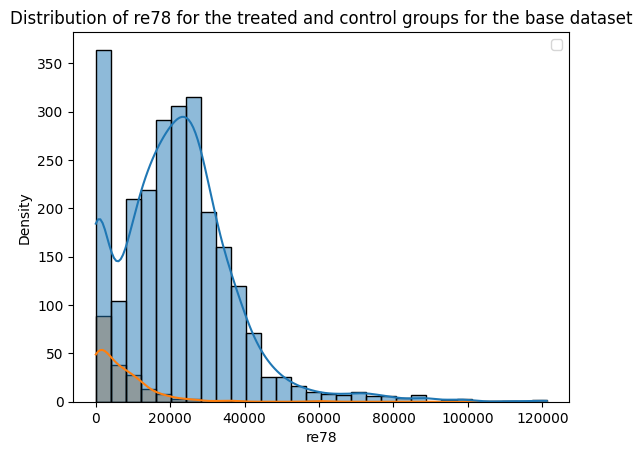

In [5]:
# Create a plot of the distribution of the outcome for the treated and control groups
sns.histplot(source_df, x='re78', hue='treat', bins=30, kde=True)
plt.xlabel('re78')
plt.ylabel('Density')
plt.legend()
plt.title('Distribution of re78 for the treated and control groups for the base dataset')

<Axes: xlabel='treat', ylabel='Count'>

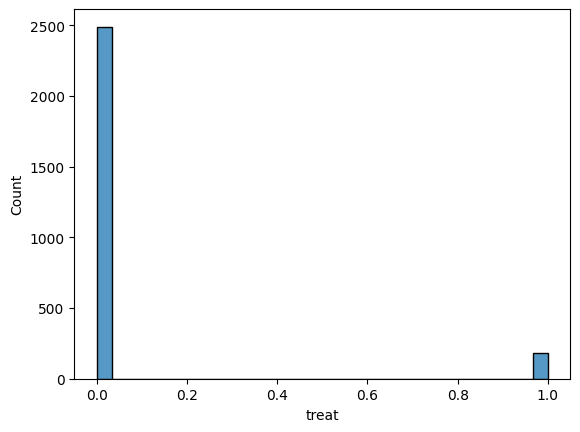

In [6]:
# Plot the distribution of the treatment P(T) 
sns.histplot(source_df, x='treat', bins=30, kde=False)

<Axes: xlabel='re78', ylabel='Count'>

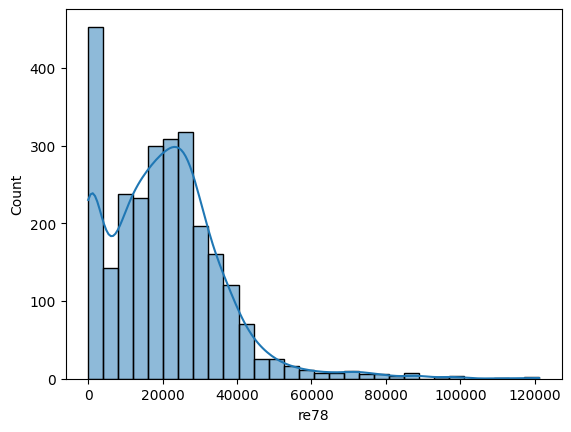

In [7]:
# Plot the marginal distribution of the outcome: P(Y)
sns.histplot(source_df, x='re78', bins=30, kde=True)

In [8]:
# Let us standardize the outcome variable so that it ranges between 0 and 1 
source_df['standardized_re78'] = (source_df['re78'] - source_df['re78'].min()) / (source_df['re78'].max() - source_df['re78'].min())

Text(0.5, 1.0, 'Standardized distribution of re78')

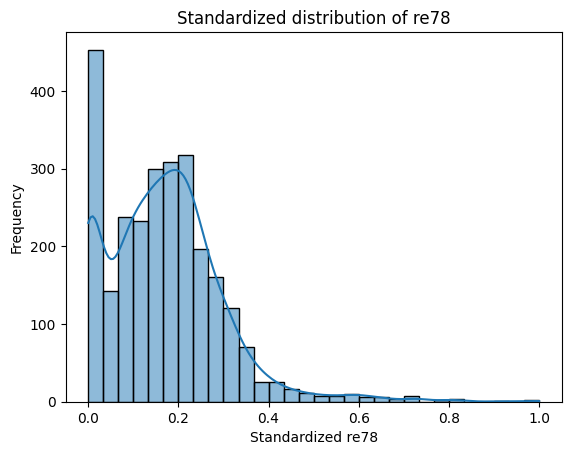

In [9]:
# Plot the standardized distribution of the outcome: P(Y)
sns.histplot(source_df, x='standardized_re78', bins=30, kde=True)
plt.xlabel('Standardized re78')
plt.ylabel('Frequency')
plt.title('Standardized distribution of re78')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Standardized distribution of re78 for the treated and control groups')

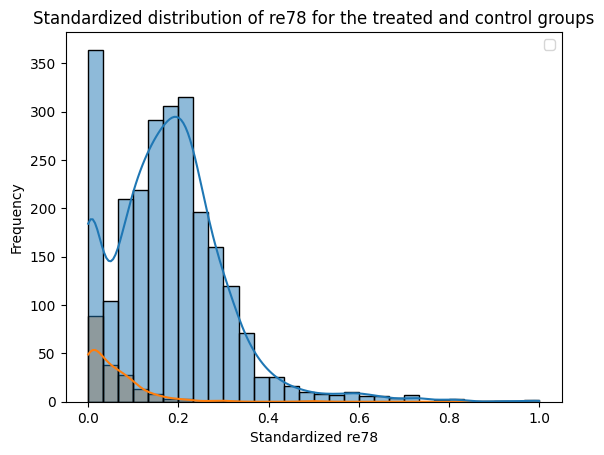

In [10]:
# Plot the standardized distribution of the outcome for the treated and control groups
sns.histplot(source_df, x='standardized_re78', hue='treat', bins=30, kde=True)
plt.xlabel('Standardized re78')
plt.ylabel('Frequency')
plt.legend()
plt.title('Standardized distribution of re78 for the treated and control groups')

In [11]:
# Let us calculate the naive ATE estimate from this dataset
naive_ate = source_df[source_df.treat == 1].re78.mean() - source_df[source_df.treat == 0].re78.mean()
print(f'Naive ATE estimate: {naive_ate}')

# Let us calculate the naive ATE estimate from this dataset using the standardized outcome
naive_ate_standardized = source_df[source_df.treat == 1].standardized_re78.mean() - source_df[source_df.treat == 0].standardized_re78.mean()
print(f'Naive ATE estimate (standardized): {naive_ate_standardized}')

Naive ATE estimate: -15204.777355042981
Naive ATE estimate (standardized): -0.12547931120829298


### Setting 1: The default settings that are used in the paper, with no particular setting for treatment_effect, overlap, or degree of heterogeneity. 

In [12]:
# Load the dataset 
# Generate a random sample from a uniform distribution between 0 and 99 
sample_num = np.random.randint(0, 100)
print(f'Sample number: {sample_num}')
rc_default_df = pd.read_csv(f'../realcause_datasets/lalonde_psid_sample{sample_num}.csv')

Sample number: 7


In [13]:
# We will examine this dataset similar to how we examined the source dataset 
rc_default_df.head()

,age,education,black,hispanic,married,nodegree,re74,re75,t,y,y0,y1,ite
0,37.0,11.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000
1,22.0,9.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,2095.9016,0.0000,2095.9016,2095.9016
2,30.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4549.8000,521.2805,4549.8000,4028.5193
3,27.0,11.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,5898.4604,11024.8370,5898.4604,-5126.3765
4,33.0,8.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0000,0.0000,6655.5747,6655.5747


In [14]:
# Get some basic information about the dataset
print(f'Total number of samples: {rc_default_df.shape[0]}')
print(f'Total number of columns: {rc_default_df.shape[1]}')
print(f'Column names: {rc_default_df.columns}')

# Find the proportion of treated and untreated samples
print(f'Count of treated samples and untreated samples:\n{rc_default_df.t.value_counts()}')
print(f'Proportion of treated samples and untreated samples:\n{rc_default_df.t.value_counts(normalize=True)}')

Total number of samples: 2675
Total number of columns: 13
Column names: Index(['age', 'education', 'black', 'hispanic', 'married', 'nodegree', 're74',
       're75', 't', 'y', 'y0', 'y1', 'ite'],
      dtype='object')
Count of treated samples and untreated samples:
t
0.0    2475
1.0     200
Name: count, dtype: int64
Proportion of treated samples and untreated samples:
t
0.0    0.925234
1.0    0.074766
Name: proportion, dtype: float64


In [15]:
# Examine whether the 't' column is exactly the same as the source dataset
print(f'Are the treatment columns the same? {all(rc_default_df.t == source_df.treat)}')

Are the treatment columns the same? False


In [16]:
# Examine for which of the covariates column, has the treatment been modified 
covariates = ['age', 'education', 'black', 'hispanic', 'married', 'nodegree', 're74', 're75']
diff_treatment = []
for snum in range(0, source_df.shape[0]):
    cov_values = source_df.loc[snum, covariates]
    rc_cov_values = rc_default_df.loc[snum, covariates]
    if not all(cov_values == rc_cov_values):
        print(f'Covariates for sample {snum} are different')
    # Extract the treatment and outcome values for each of these samples
    treat_val = source_df.loc[snum, 'treat']
    re78_val = source_df.loc[snum, 're78']
    rc_treat_val = rc_default_df.loc[snum, 't']
    rc_re78_val = rc_default_df.loc[snum, 'y']

    if treat_val != rc_treat_val:
        diff_treatment.append(snum)

print(f'Number of samples with different treatment: {len(diff_treatment)}')
print(f'Samples with different treatment: {diff_treatment}')

Number of samples with different treatment: 245
Samples with different treatment: [0, 4, 7, 8, 12, 14, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 36, 37, 40, 44, 45, 47, 49, 50, 51, 52, 54, 57, 58, 59, 61, 64, 66, 69, 72, 74, 76, 78, 79, 80, 82, 87, 92, 93, 94, 96, 97, 98, 102, 104, 108, 109, 112, 113, 114, 116, 117, 120, 121, 122, 123, 125, 127, 128, 129, 130, 133, 134, 136, 137, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 151, 152, 153, 155, 156, 157, 159, 160, 161, 162, 163, 164, 165, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 180, 181, 182, 183, 184, 189, 192, 193, 194, 196, 197, 198, 200, 201, 202, 203, 204, 205, 210, 211, 213, 214, 215, 217, 219, 221, 223, 226, 227, 231, 233, 235, 237, 239, 240, 241, 242, 248, 250, 251, 254, 260, 261, 264, 266, 267, 268, 271, 275, 279, 281, 282, 283, 285, 286, 287, 288, 292, 326, 327, 328, 329, 335, 337, 338, 351, 353, 372, 385, 399, 408, 416, 417, 429, 431, 438, 461, 481, 650, 654, 709, 925, 1915, 1917, 192

Now we have established that the treatment is not directly sampled from the real dataset, but is a subset of the distribution. 

Text(0.5, 1.0, 'Distribution of the treatment compared to the source dataset')

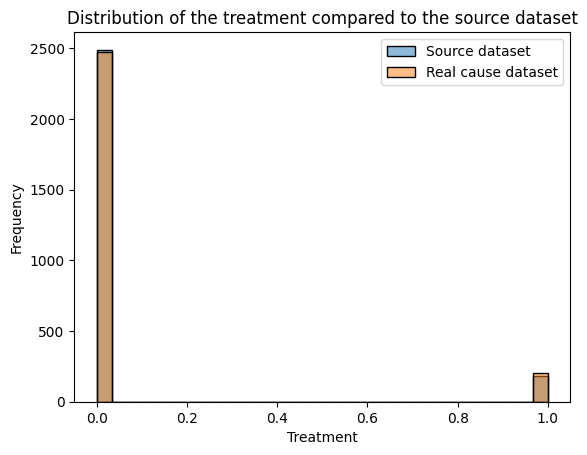

In [17]:
# Plot the distribution of the treatment comparing the 'treat' and 't' columns
sns.histplot(source_df, x='treat', bins=30, kde=False, alpha=0.5, label='Source dataset')
sns.histplot(rc_default_df, x='t', bins=30, kde=False, alpha=0.5, label='Real cause dataset')
plt.xlabel('Treatment')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of the treatment compared to the source dataset')

Text(0.5, 1.0, 'Distribution of the outcome compared to the source dataset')

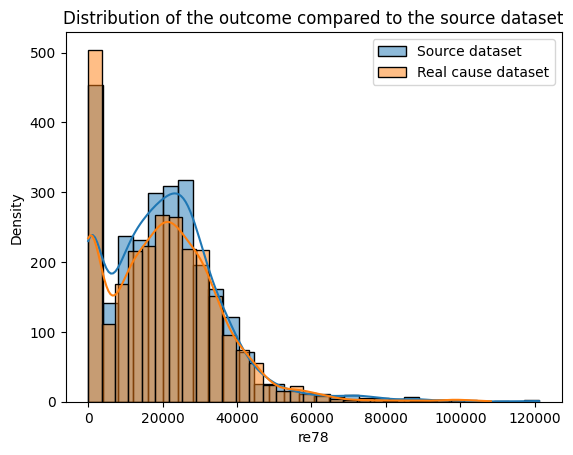

In [18]:
# Plot the distribution of the outcome comparing the 're78' and 'y' columns
sns.histplot(source_df, x='re78', bins=30, kde=True, alpha=0.5, label='Source dataset')
sns.histplot(rc_default_df, x='y', bins=30, kde=True, alpha=0.5, label='Real cause dataset')
plt.xlabel('re78')
plt.ylabel('Density')
plt.legend()
plt.title('Distribution of the outcome compared to the source dataset')

Text(0.5, 1.0, 'Distribution of the outcome for the treated group compared to the source dataset')

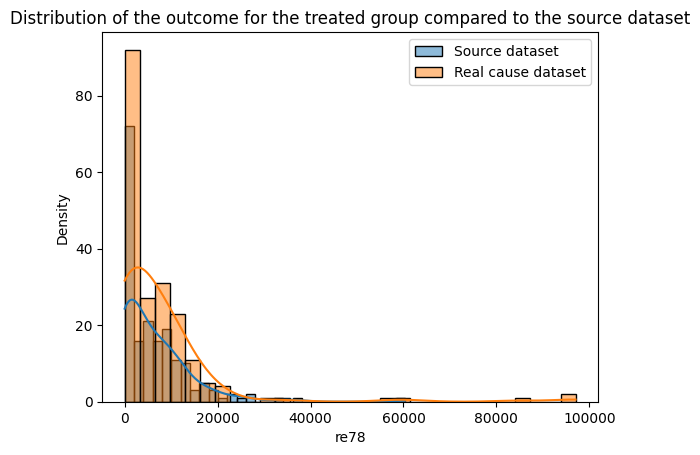

In [19]:
# Create the same plots for different treatment groups
sns.histplot(source_df[source_df.treat == 1], x='re78', bins=30, kde=True, alpha=0.5, label='Source dataset')
sns.histplot(rc_default_df[rc_default_df.t == 1], x='y', bins=30, kde=True, alpha=0.5, label='Real cause dataset')
plt.xlabel('re78')
plt.ylabel('Density')
plt.legend()
plt.title('Distribution of the outcome for the treated group compared to the source dataset')

Text(0.5, 1.0, 'Distribution of the outcome for the control group compared to the source dataset')

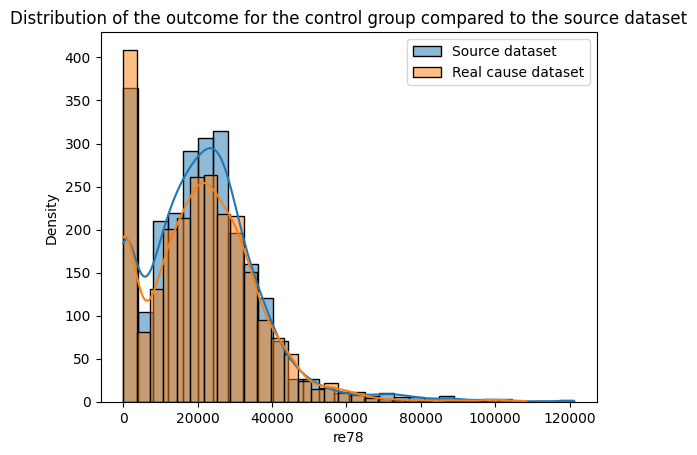

In [20]:
# Create the same plots for different treatment groups
sns.histplot(source_df[source_df.treat == 0], x='re78', bins=30, kde=True, alpha=0.5, label='Source dataset')
sns.histplot(rc_default_df[rc_default_df.t == 0], x='y', bins=30, kde=True, alpha=0.5, label='Real cause dataset')
plt.xlabel('re78')
plt.ylabel('Density')
plt.legend()
plt.title('Distribution of the outcome for the control group compared to the source dataset')

Text(0.5, 1.0, 'Distribution of ITE for the real cause dataset')

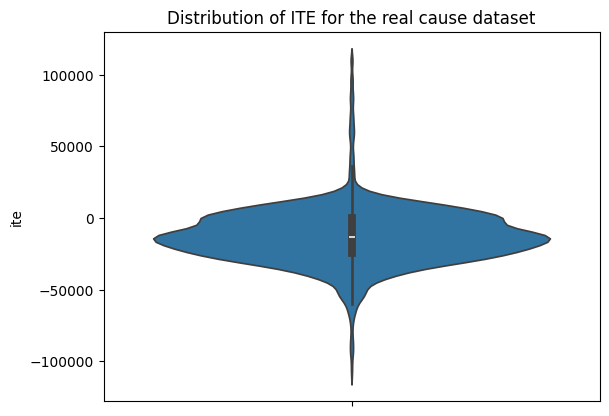

In [24]:
sns.violinplot(data=rc_default_df, y='ite')
plt.title('Distribution of ITE for the real cause dataset')

In [21]:
# Compute the naive ATE estimate for the real cause dataset
naive_ate = rc_default_df[rc_default_df.t == 1].y.mean() - rc_default_df[rc_default_df.t == 0].y.mean()
print(f'Naive ATE estimate: {naive_ate}')

# Standardize the outcome variable and calculate the naive ATE estimate
rc_default_df['standardized_y'] = (rc_default_df['y'] - rc_default_df['y'].min()) / (rc_default_df['y'].max() - rc_default_df['y'].min())
naive_ate_standardized = rc_default_df[rc_default_df.t == 1].standardized_y.mean() - rc_default_df[rc_default_df.t == 0].standardized_y.mean()
print(f'Naive ATE estimate (standardized): {naive_ate_standardized}')

Naive ATE estimate: -13769.145931111922
Naive ATE estimate (standardized): -0.12724297259972747


TODO: How do we quantify the difference between these two distributions? We can use the multivariate statistical tests that are used in the RealCause paper. 

For these default settings, we note that the marginal distribution of the treatment and outcome are similar. What if we were to impose an additional restriction on the dataset, such as the scale of the treatment effect. We will generate a data sets with these restrictions and repeat the analysis above.

### Realcause: Setting 2

Here, we generate datasets with the constraint that the treatment effect = 10.0

In [25]:
# Read in the data 
rc_set2_snum = np.random.randint(0, 10)
print(f'Sample number: {rc_set2_snum}')
rc_setting2_df = pd.read_csv(f'../nfl_datasets/lalonde_psid_setting2/lalonde_psid_sample{rc_set2_snum}.csv')

Sample number: 2


In [26]:
# Examine the dataset
rc_setting2_df.head()

,age,education,black,hispanic,married,nodegree,re74,re75,t,y,y0,y1,ite
0,37.0,11.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,-1258820.00,-1258820.0,-558123.06,700696.94
1,22.0,9.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-90288.01,0.0,-90288.01,-90288.01
2,30.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-407536.60,-407536.6,-1051865.50,-644328.90
3,27.0,11.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00
4,33.0,8.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00,0.0,-662573.75,-662573.75


In [27]:
# Get some basic information about the dataset
print(f'Total number of samples: {rc_setting2_df.shape[0]}')
print(f'Total number of columns: {rc_setting2_df.shape[1]}')
print(f'Column names: {rc_setting2_df.columns}')

# Find the proportion of treated and untreated samples
print(f'Count of treated samples and untreated samples:\n{rc_setting2_df.t.value_counts()}')
print(f'Proportion of treated samples and untreated samples:\n{rc_setting2_df.t.value_counts(normalize=True)}')

Total number of samples: 2675
Total number of columns: 13
Column names: Index(['age', 'education', 'black', 'hispanic', 'married', 'nodegree', 're74',
       're75', 't', 'y', 'y0', 'y1', 'ite'],
      dtype='object')
Count of treated samples and untreated samples:
t
0.0    2482
1.0     193
Name: count, dtype: int64
Proportion of treated samples and untreated samples:
t
0.0    0.92785
1.0    0.07215
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Distribution of the treatment compared to the source dataset')

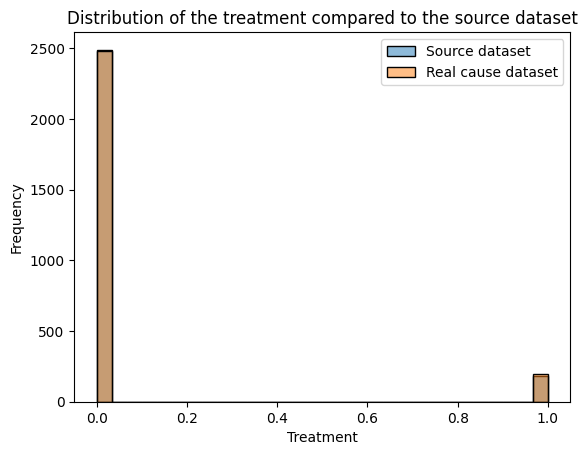

In [28]:
# Plot the distribution of the treatment comparing the 'treat' and 't' columns
sns.histplot(source_df, x='treat', bins=30, kde=False, alpha=0.5, label='Source dataset')
sns.histplot(rc_setting2_df, x='t', bins=30, kde=False, alpha=0.5, label='Real cause dataset')
plt.xlabel('Treatment')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of the treatment compared to the source dataset')

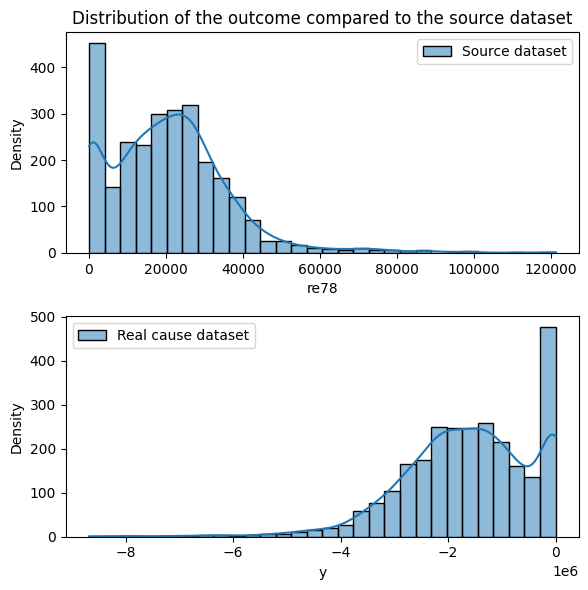

In [29]:
# Plot the distribution of the outcome comparing the 're78' and 'y' columns
plt.figure(figsize=(6, 6))
plt.subplot(2, 1, 1)
sns.histplot(source_df, x='re78', bins=30, kde=True, alpha=0.5, label='Source dataset')
plt.xlabel('re78')
plt.ylabel('Density')
plt.legend()
plt.title('Distribution of the outcome compared to the source dataset')
plt.subplot(2, 1, 2)
sns.histplot(rc_setting2_df, x='y', bins=30, kde=True, alpha=0.5, label='Real cause dataset')
plt.xlabel('y')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()

Text(0.5, 1.0, 'Distribution of the outcome compared to the source dataset')

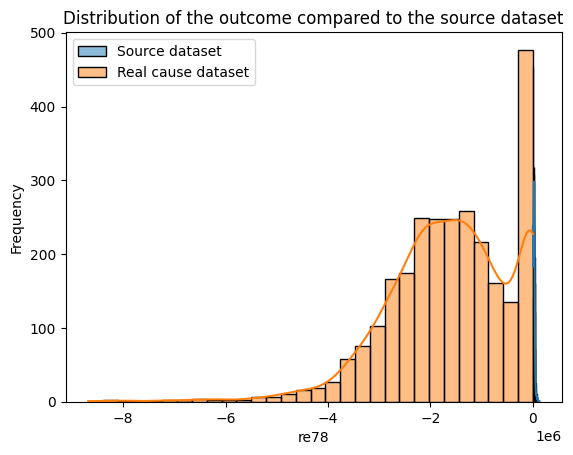

In [30]:
# Plot the distribution of values without doing density estimation on the same plot
sns.histplot(source_df, x='re78', bins=30, kde=True, alpha=0.5, label='Source dataset')
sns.histplot(rc_setting2_df, x='y', bins=30, kde=True, alpha=0.5, label='Real cause dataset')
plt.xlabel('re78')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of the outcome compared to the source dataset')

In [31]:
# Let us standardize the outcome variable so that it ranges between 0 and 1
rc_setting2_df['standardized_y'] = (rc_setting2_df['y'] - rc_setting2_df['y'].min()) / (rc_setting2_df['y'].max() - rc_setting2_df['y'].min())
# Compute the naive ATE estimate for the real cause dataset using the standardized outcome as well as the original outcome
naive_ate = rc_setting2_df[rc_setting2_df.t == 1].y.mean() - rc_setting2_df[rc_setting2_df.t == 0].y.mean()
naive_ate_standardized = rc_setting2_df[rc_setting2_df.t == 1].standardized_y.mean() - rc_setting2_df[rc_setting2_df.t == 0].standardized_y.mean()
print(f'Naive ATE estimate: {naive_ate}')
print(f'Naive ATE estimate (standardized): {naive_ate_standardized}')

Naive ATE estimate: 1155028.7454250793
Naive ATE estimate (standardized): 0.1330607608772254


Text(0.5, 1.0, 'Comparison of the standardized distribution of the outcome')

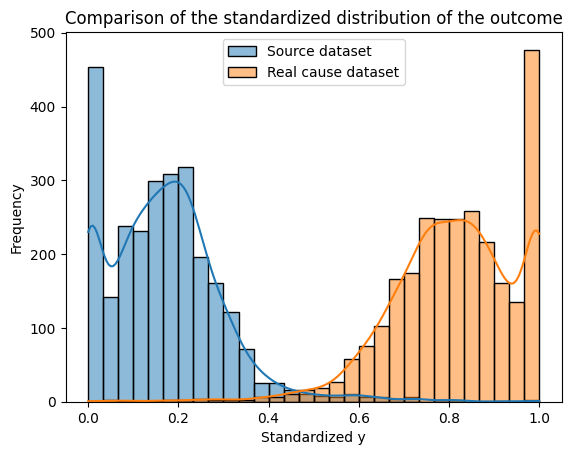

In [32]:
# Plot the standardized distribution of the outcome: P(Y)
sns.histplot(source_df, x='standardized_re78', bins=30, kde=True, alpha=0.5, label='Source dataset')
sns.histplot(rc_setting2_df, x='standardized_y', bins=30, kde=True, alpha=0.5, label='Real cause dataset')
plt.xlabel('Standardized y')
plt.ylabel('Frequency')
plt.legend()
plt.title('Comparison of the standardized distribution of the outcome')

Text(0.5, 1.0, 'Comparison of the standardized distribution of the outcome for the treated group')

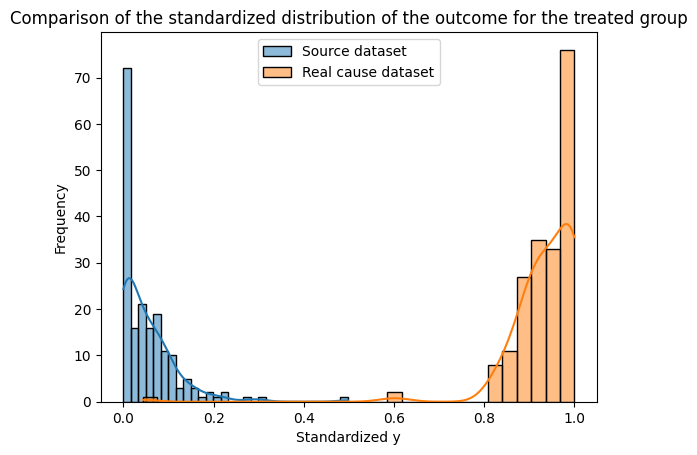

In [33]:
# Compare the distributions of the outcome for the treated and control groups
sns.histplot(source_df[source_df.treat == 1], x='standardized_re78', bins=30, kde=True, alpha=0.5, label='Source dataset')
sns.histplot(rc_setting2_df[rc_setting2_df.t == 1], x='standardized_y', bins=30, kde=True, alpha=0.5, label='Real cause dataset')
plt.xlabel('Standardized y')
plt.ylabel('Frequency')
plt.legend()
plt.title('Comparison of the standardized distribution of the outcome for the treated group')

Text(0.5, 1.0, 'Comparison of the standardized distribution of the outcome for the control group')

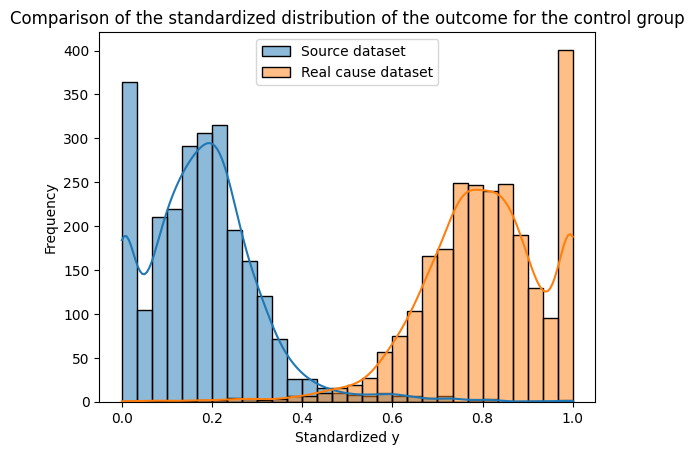

In [34]:
# Compare the distributions of the outcome for the treated and control groups
sns.histplot(source_df[source_df.treat == 0], x='standardized_re78', bins=30, kde=True, alpha=0.5, label='Source dataset')
sns.histplot(rc_setting2_df[rc_setting2_df.t == 0], x='standardized_y', bins=30, kde=True, alpha=0.5, label='Real cause dataset')
plt.xlabel('Standardized y')
plt.ylabel('Frequency')
plt.legend()
plt.title('Comparison of the standardized distribution of the outcome for the control group')

Text(0.5, 1.0, 'Distribution of ITE for the real cause dataset')

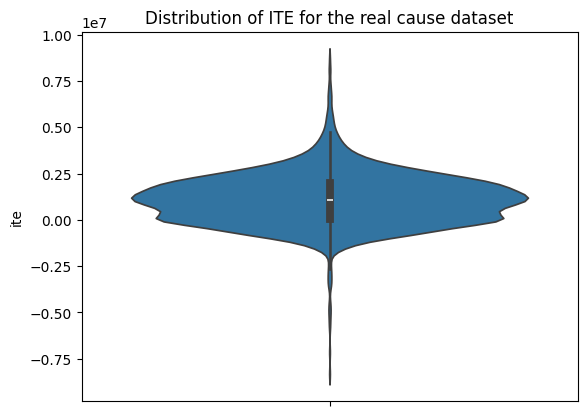

In [35]:
# Plot the ITE distribution for the real cause dataset
sns.violinplot(data=rc_setting2_df, y='ite')
plt.title('Distribution of ITE for the real cause dataset')

This has probably flipped the shape of the data because the naive ATE estimate is positive. We can repeat the same experiment with a negative ATE to ensure that they remain comparable. 

### Realcause: Setting 3 

We try with a negative causal effect, all the other settings remain unchanged. 

In [36]:
# Read in the data
rc_set3_snum = np.random.randint(0, 10)
print(f'Sample number: {rc_set3_snum}')
rc_setting3_df = pd.read_csv(f'../nfl_datasets/lalonde_psid_setting3/lalonde_psid_sample{rc_set3_snum}.csv')

Sample number: 8


In [37]:
# Examine the dataset
rc_setting3_df.head()

,age,education,black,hispanic,married,nodegree,re74,re75,t,y,y0,y1,ite
0,37.0,11.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,446467.60,446467.60,380410.28,-66057.31
1,22.0,9.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,287620.70,287620.70,0.00,-287620.70
2,30.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,92694.67,92694.67,831827.40,739132.70
3,27.0,11.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00,0.00,536114.70,536114.70
4,33.0,8.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.00,0.00,0.00,0.00


In [38]:
# Get some basic information about the dataset
print(f'Total number of samples: {rc_setting3_df.shape[0]}')
print(f'Total number of columns: {rc_setting3_df.shape[1]}')
print(f'Column names: {rc_setting3_df.columns}')

# Find the proportion of treated and untreated samples
print(f'Count of treated samples and untreated samples:\n{rc_setting3_df.t.value_counts()}')
print(f'Proportion of treated samples and untreated samples:\n{rc_setting3_df.t.value_counts(normalize=True)}')

Total number of samples: 2675
Total number of columns: 13
Column names: Index(['age', 'education', 'black', 'hispanic', 'married', 'nodegree', 're74',
       're75', 't', 'y', 'y0', 'y1', 'ite'],
      dtype='object')
Count of treated samples and untreated samples:
t
0.0    2492
1.0     183
Name: count, dtype: int64
Proportion of treated samples and untreated samples:
t
0.0    0.931589
1.0    0.068411
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Distribution of the treatment compared to the source dataset')

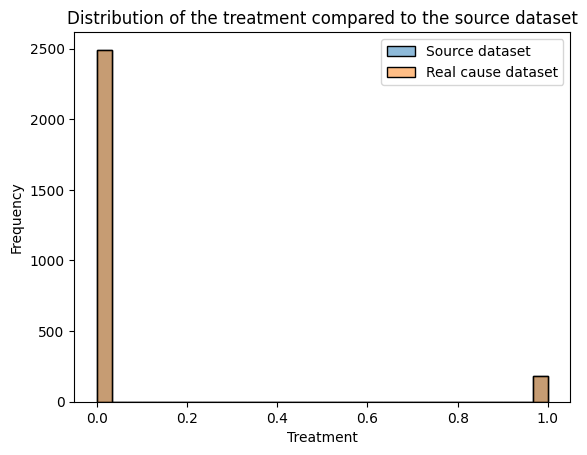

In [39]:
# Plot the distribution of the treatment comparing the 'treat' and 't' columns
sns.histplot(source_df, x='treat', bins=30, kde=False, alpha=0.5, label='Source dataset')
sns.histplot(rc_setting3_df, x='t', bins=30, kde=False, alpha=0.5, label='Real cause dataset')
plt.xlabel('Treatment')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of the treatment compared to the source dataset')

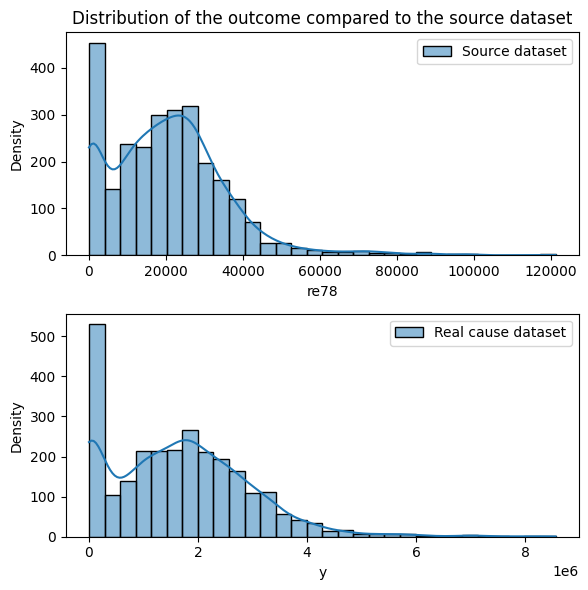

In [40]:
# Plot the distribution of the outcome comparing the 're78' and 'y' columns
plt.figure(figsize=(6, 6))
plt.subplot(2, 1, 1)
sns.histplot(source_df, x='re78', bins=30, kde=True, alpha=0.5, label='Source dataset')
plt.xlabel('re78')
plt.ylabel('Density')
plt.legend()
plt.title('Distribution of the outcome compared to the source dataset')
plt.subplot(2, 1, 2)
sns.histplot(rc_setting3_df, x='y', bins=30, kde=True, alpha=0.5, label='Real cause dataset')
plt.xlabel('y')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()

Text(0.5, 1.0, 'Distribution of the outcome compared to the source dataset')

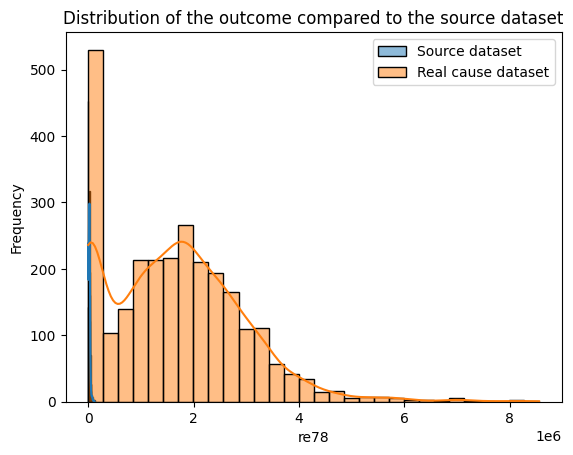

In [41]:
# Plot the distribution of values without doing density estimation on the same plot
sns.histplot(source_df, x='re78', bins=30, kde=True, alpha=0.5, label='Source dataset')
sns.histplot(rc_setting3_df, x='y', bins=30, kde=True, alpha=0.5, label='Real cause dataset')
plt.xlabel('re78')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of the outcome compared to the source dataset')

In [42]:
# Let us standardize the outcome variable so that it ranges between 0 and 1
rc_setting3_df['standardized_y'] = (rc_setting3_df['y'] - rc_setting3_df['y'].min()) / (rc_setting3_df['y'].max() - rc_setting3_df['y'].min())
# Compute the naive ATE estimate for the real cause dataset using the standardized outcome as well as the original outcome
naive_ate = rc_setting3_df[rc_setting3_df.t == 1].y.mean() - rc_setting3_df[rc_setting3_df.t == 0].y.mean()
naive_ate_standardized = rc_setting3_df[rc_setting3_df.t == 1].standardized_y.mean() - rc_setting3_df[rc_setting3_df.t == 0].standardized_y.mean()
print(f'Naive ATE estimate: {naive_ate}')
print(f'Naive ATE estimate (standardized): {naive_ate_standardized}')

Naive ATE estimate: -1229064.4677832483
Naive ATE estimate (standardized): -0.14368653752117458


Text(0.5, 1.0, 'Comparison of the standardized distribution of the outcome')

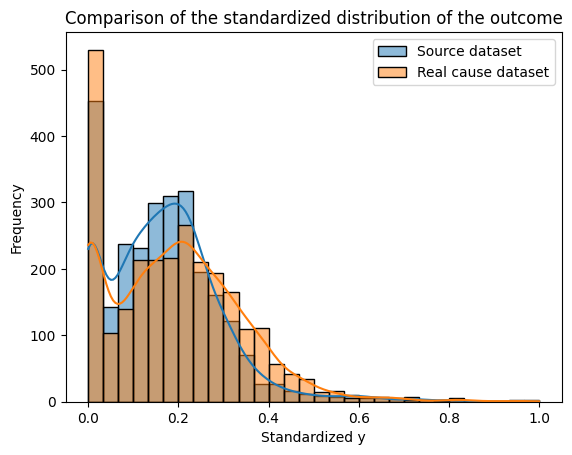

In [43]:
# Plot the standardized distribution of the outcome: P(Y)
sns.histplot(source_df, x='standardized_re78', bins=30, kde=True, alpha=0.5, label='Source dataset')
sns.histplot(rc_setting3_df, x='standardized_y', bins=30, kde=True, alpha=0.5, label='Real cause dataset')
plt.xlabel('Standardized y')
plt.ylabel('Frequency')
plt.legend()
plt.title('Comparison of the standardized distribution of the outcome')

Text(0.5, 1.0, 'Comparison of the standardized distribution of the outcome for the treated group')

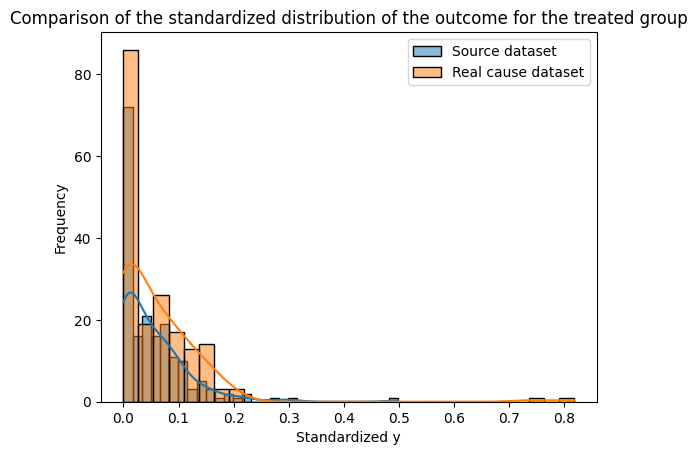

In [44]:
# Compare the distributions of the outcome for the treated and control groups
sns.histplot(source_df[source_df.treat == 1], x='standardized_re78', bins=30, kde=True, alpha=0.5, label='Source dataset')
sns.histplot(rc_setting3_df[rc_setting3_df.t == 1], x='standardized_y', bins=30, kde=True, alpha=0.5, label='Real cause dataset')
plt.xlabel('Standardized y')
plt.ylabel('Frequency')
plt.legend()
plt.title('Comparison of the standardized distribution of the outcome for the treated group')

Text(0.5, 1.0, 'Comparison of the standardized distribution of the outcome for the control group')

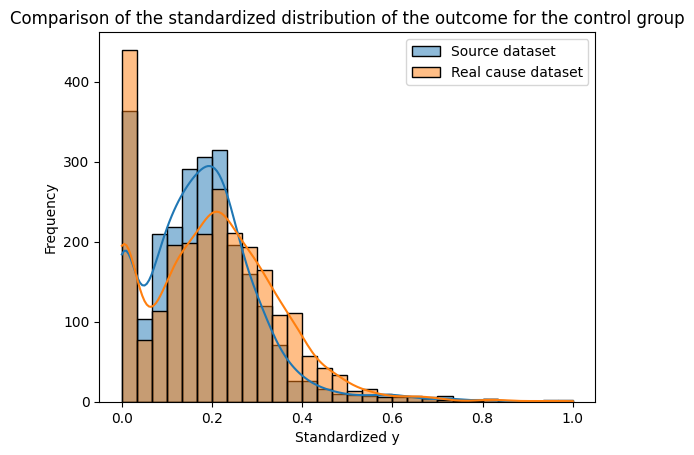

In [45]:
# Compare the distributions of the outcome for the treated and control groups
sns.histplot(source_df[source_df.treat == 0], x='standardized_re78', bins=30, kde=True, alpha=0.5, label='Source dataset')
sns.histplot(rc_setting3_df[rc_setting3_df.t == 0], x='standardized_y', bins=30, kde=True, alpha=0.5, label='Real cause dataset')
plt.xlabel('Standardized y')
plt.ylabel('Frequency')
plt.legend()
plt.title('Comparison of the standardized distribution of the outcome for the control group')

Text(0.5, 1.0, 'Distribution of ITE for the real cause dataset')

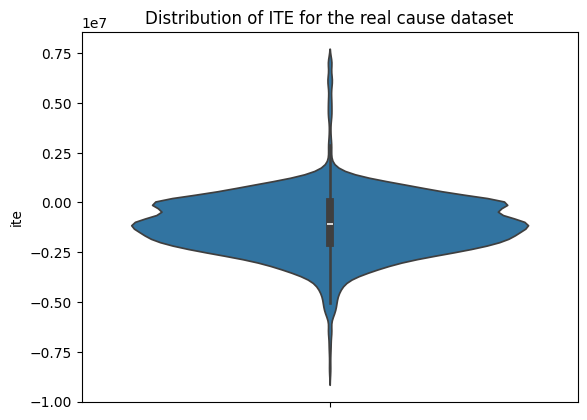

In [46]:
# PLot ITE distribution for the real cause dataset
sns.violinplot(data=rc_setting3_df, y='ite')
plt.title('Distribution of ITE for the real cause dataset')

### Realcause: Setting 4

Now we examine the effect of leaving the outcome 'y' in the desired scale of the causal effect set by the user.

In [47]:
# Read in the data
rc_set4_snum = np.random.randint(0, 10)
print(f'Sample number: {rc_set4_snum}')
rc_setting4_df = pd.read_csv(f'../nfl_datasets/lalonde_psid_setting4/lalonde_psid_sample{rc_set4_snum}.csv')

Sample number: 7


In [48]:
# Examine the dataset
rc_setting4_df.head()

,age,education,black,hispanic,married,nodegree,re74,re75,t,y,y0,y1,ite
0,37.0,11.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.000000,5.448270,0.000000,-5.448270
1,22.0,9.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,7.511302,7.511302
2,30.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.227197,4.227197,2.711347,-1.515849
3,27.0,11.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,1.217958,1.217958
4,33.0,8.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000


In [49]:
# Get some basic information about the dataset
print(f'Total number of samples: {rc_setting4_df.shape[0]}')
print(f'Total number of columns: {rc_setting4_df.shape[1]}')
print(f'Column names: {rc_setting4_df.columns}')

# Find the proportion of treated and untreated samples
print(f'Count of treated samples and untreated samples:\n{rc_setting4_df.t.value_counts()}')
print(f'Proportion of treated samples and untreated samples:\n{rc_setting4_df.t.value_counts(normalize=True)}')

Total number of samples: 2675
Total number of columns: 13
Column names: Index(['age', 'education', 'black', 'hispanic', 'married', 'nodegree', 're74',
       're75', 't', 'y', 'y0', 'y1', 'ite'],
      dtype='object')
Count of treated samples and untreated samples:
t
0.0    2480
1.0     195
Name: count, dtype: int64
Proportion of treated samples and untreated samples:
t
0.0    0.927103
1.0    0.072897
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Distribution of the treatment compared to the source dataset')

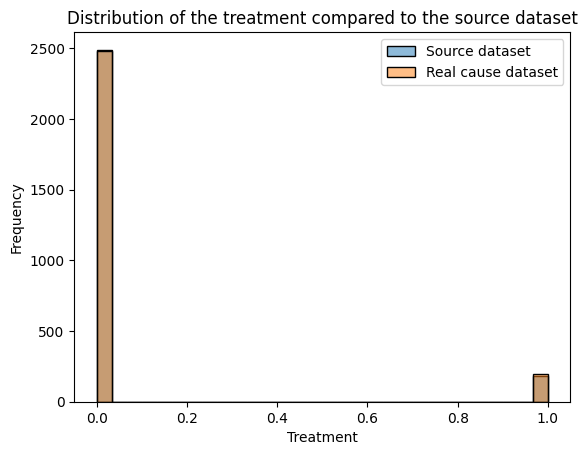

In [50]:
# Plot the distribution of the treatment comparing the 'treat' and 't' columns
sns.histplot(source_df, x='treat', bins=30, kde=False, alpha=0.5, label='Source dataset')
sns.histplot(rc_setting4_df, x='t', bins=30, kde=False, alpha=0.5, label='Real cause dataset')
plt.xlabel('Treatment')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of the treatment compared to the source dataset')

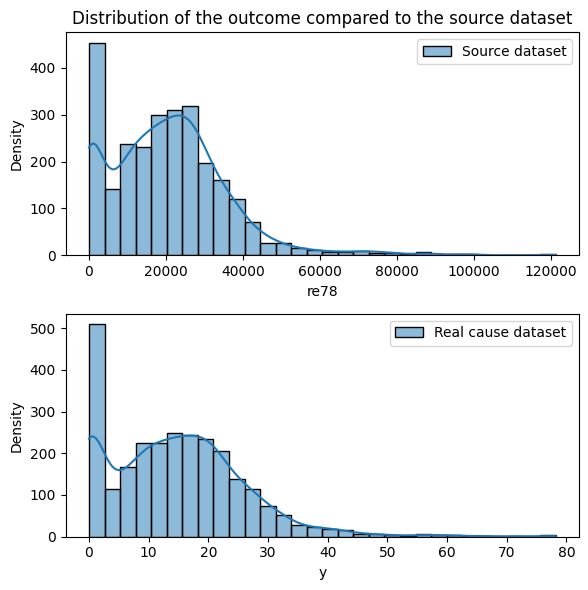

In [51]:
# Plot the distribution of the outcome comparing the 're78' and 'y' columns
plt.figure(figsize=(6, 6))
plt.subplot(2, 1, 1)
sns.histplot(source_df, x='re78', bins=30, kde=True, alpha=0.5, label='Source dataset')
plt.xlabel('re78')
plt.ylabel('Density')
plt.legend()
plt.title('Distribution of the outcome compared to the source dataset')

plt.subplot(2, 1, 2)
sns.histplot(rc_setting4_df, x='y', bins=30, kde=True, alpha=0.5, label='Real cause dataset')
plt.xlabel('y')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()

Text(0.5, 1.0, 'Distribution of the outcome compared to the source dataset')

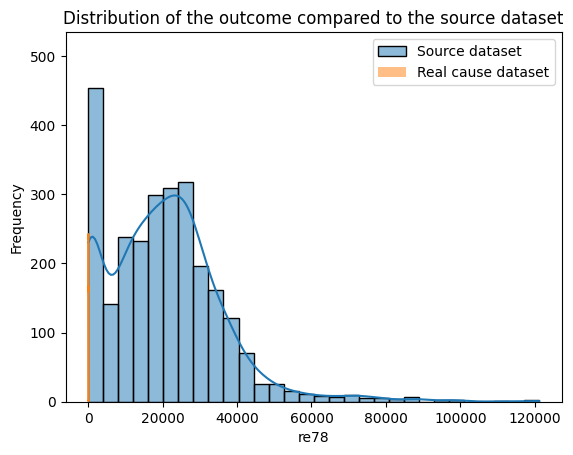

In [52]:
# Plot the distribution of values without doing density estimation on the same plot
sns.histplot(source_df, x='re78', bins=30, kde=True, alpha=0.5, label='Source dataset')
sns.histplot(rc_setting4_df, x='y', bins=30, kde=True, alpha=0.5, label='Real cause dataset')
plt.xlabel('re78')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of the outcome compared to the source dataset')

In [53]:
# Let us standardize the outcome variable so that it ranges between 0 and 1
rc_setting4_df['standardized_y'] = (rc_setting4_df['y'] - rc_setting4_df['y'].min()) / (rc_setting4_df['y'].max() - rc_setting4_df['y'].min())
# Compute the naive ATE estimate for the real cause dataset using the standardized outcome as well as the original outcome
naive_ate = rc_setting4_df[rc_setting4_df.t == 1].y.mean() - rc_setting4_df[rc_setting4_df.t == 0].y.mean()
naive_ate_standardized = rc_setting4_df[rc_setting4_df.t == 1].standardized_y.mean() - rc_setting4_df[rc_setting4_df.t == 0].standardized_y.mean()
print(f'Naive ATE estimate: {naive_ate}')
print(f'Naive ATE estimate (standardized): {naive_ate_standardized}')

Naive ATE estimate: -11.15352170744751
Naive ATE estimate (standardized): -0.14265254439854375


Text(0.5, 1.0, 'Comparison of the standardized distribution of the outcome')

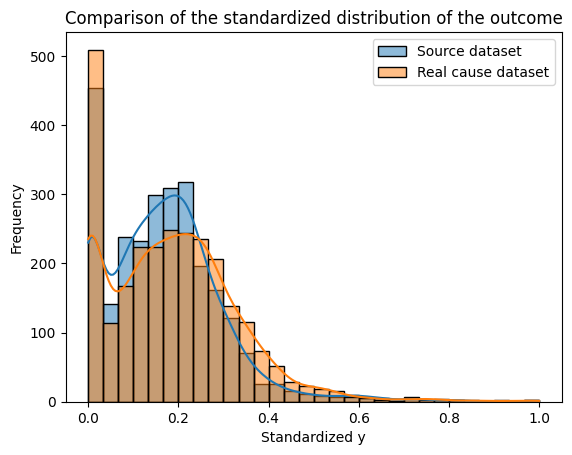

In [54]:
# Plot the standardized distribution of the outcome: P(Y)
sns.histplot(source_df, x='standardized_re78', bins=30, kde=True, alpha=0.5, label='Source dataset')
sns.histplot(rc_setting4_df, x='standardized_y', bins=30, kde=True, alpha=0.5, label='Real cause dataset')
plt.xlabel('Standardized y')
plt.ylabel('Frequency')
plt.legend()
plt.title('Comparison of the standardized distribution of the outcome')

Text(0.5, 1.0, 'Comparison of the standardized distribution of the outcome for the treated group')

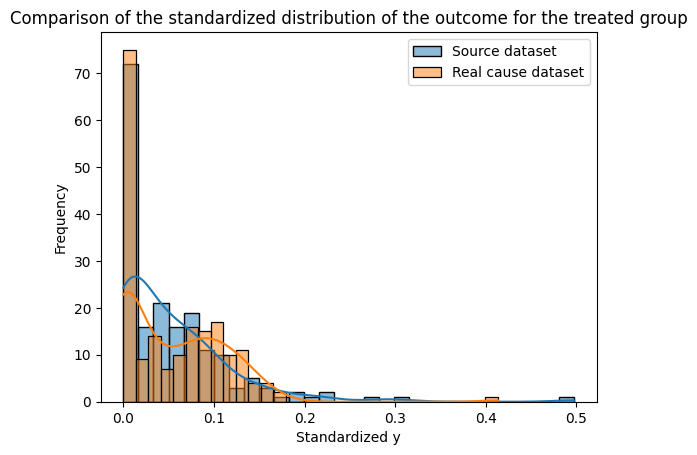

In [55]:
# Compare the distributions of the outcome for the treated and control groups
sns.histplot(source_df[source_df.treat == 1], x='standardized_re78', bins=30, kde=True, alpha=0.5, label='Source dataset')
sns.histplot(rc_setting4_df[rc_setting4_df.t == 1], x='standardized_y', bins=30, kde=True, alpha=0.5, label='Real cause dataset')
plt.xlabel('Standardized y')
plt.ylabel('Frequency')
plt.legend()
plt.title('Comparison of the standardized distribution of the outcome for the treated group')

Text(0.5, 1.0, 'Distribution of ITE for the real cause dataset')

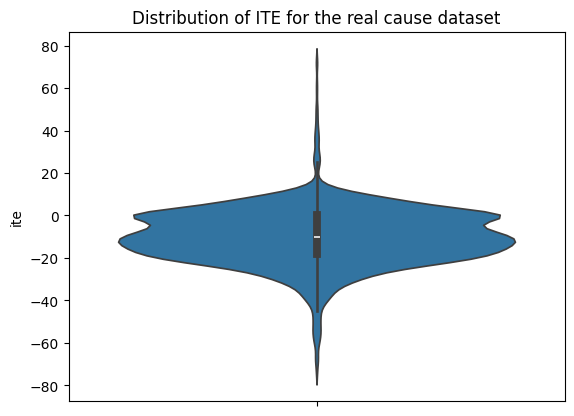

In [56]:
# Plot ite distribution for the real cause dataset
sns.violinplot(data=rc_setting4_df, y='ite')
plt.title('Distribution of ITE for the real cause dataset')

### Realcause: Setting 5

In this case, we examine the effect of changing the heterogeneity parameter on the datasets. We set the degree of heterogeneity to 0.5. When this value = 1 (which is the default) behavior, both Y1 and Y0 are unchanged. When deg_hetero = 0, either Y1 or Y0 is shrunk down to match the mean of the difference between Y1 and Y0. If causal effect is set to a particular value, then we have that to be the difference between Y1 and Y0. 

In [62]:
# Load the dataset
rc_set5_snum = np.random.randint(0, 10)
print(f'Sample number: {rc_set5_snum}')
rc_setting5_df = pd.read_csv(f'../nfl_datasets/lalonde_psid_setting5/lalonde_psid_sample{rc_set5_snum}.csv')

Sample number: 7


In [63]:
# Examine the dataset
rc_setting5_df.head()

,age,education,black,hispanic,married,nodegree,re74,re75,t,y,y0,y1,ite
0,37.0,11.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,-2226.221167,9458.150199,-2226.221167,-11684.371366
1,22.0,9.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,9837.833328,9837.833328,3187.953888,-6649.879441
2,30.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10561.263261,10561.263261,211.157983,-10350.105278
3,27.0,11.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,815.205776,815.205776,-5700.567146,-6515.772922
4,33.0,8.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,8169.135934,8169.135934,-2870.728299,-11039.864234


In [64]:
# Get some basic information about the dataset
print(f'Total number of samples: {rc_setting5_df.shape[0]}')
print(f'Total number of columns: {rc_setting5_df.shape[1]}')
print(f'Column names: {rc_setting5_df.columns}')

# Find the proportion of treated and untreated samples
print(f'Count of treated samples and untreated samples:\n{rc_setting5_df.t.value_counts()}')
print(f'Proportion of treated samples and untreated samples:\n{rc_setting5_df.t.value_counts(normalize=True)}')

Total number of samples: 2675
Total number of columns: 13
Column names: Index(['age', 'education', 'black', 'hispanic', 'married', 'nodegree', 're74',
       're75', 't', 'y', 'y0', 'y1', 'ite'],
      dtype='object')
Count of treated samples and untreated samples:
t
0.0    2480
1.0     195
Name: count, dtype: int64
Proportion of treated samples and untreated samples:
t
0.0    0.927103
1.0    0.072897
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Distribution of the treatment compared to the source dataset')

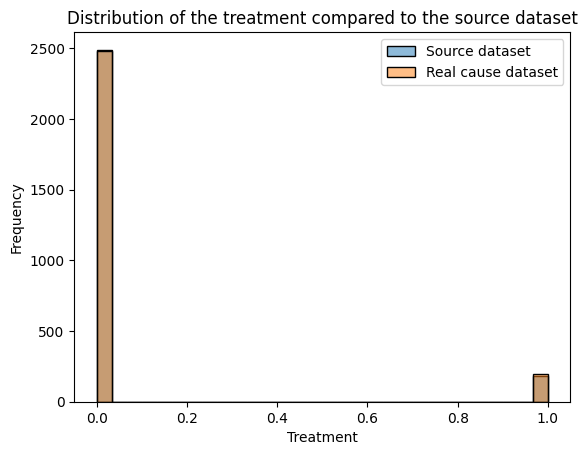

In [65]:
# Plot the distribution of the treatment comparing the 'treat' and 't' columns
sns.histplot(source_df, x='treat', bins=30, kde=False, alpha=0.5, label='Source dataset')
sns.histplot(rc_setting5_df, x='t', bins=30, kde=False, alpha=0.5, label='Real cause dataset')
plt.xlabel('Treatment')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of the treatment compared to the source dataset')

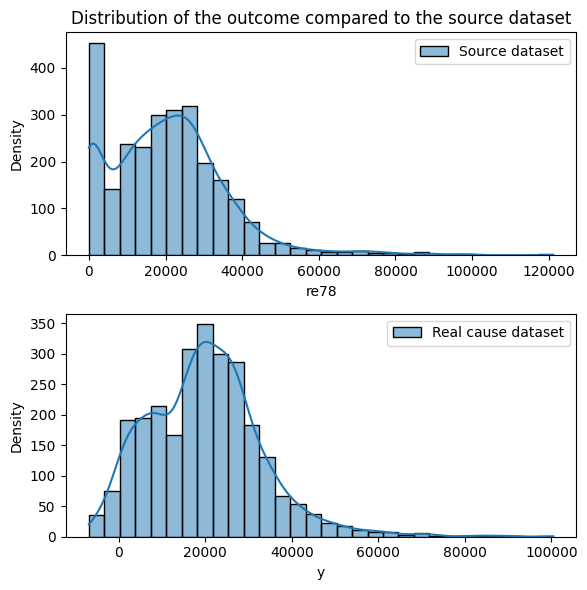

In [66]:
# Plot the distribution of the outcome comparing the 're78' and 'y' columns
plt.figure(figsize=(6, 6))
plt.subplot(2, 1, 1)
sns.histplot(source_df, x='re78', bins=30, kde=True, alpha=0.5, label='Source dataset')
plt.xlabel('re78')
plt.ylabel('Density')
plt.legend()
plt.title('Distribution of the outcome compared to the source dataset')

plt.subplot(2, 1, 2)
sns.histplot(rc_setting5_df, x='y', bins=30, kde=True, alpha=0.5, label='Real cause dataset')
plt.xlabel('y')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()

Text(0.5, 1.0, 'Distribution of the outcome compared to the source dataset')

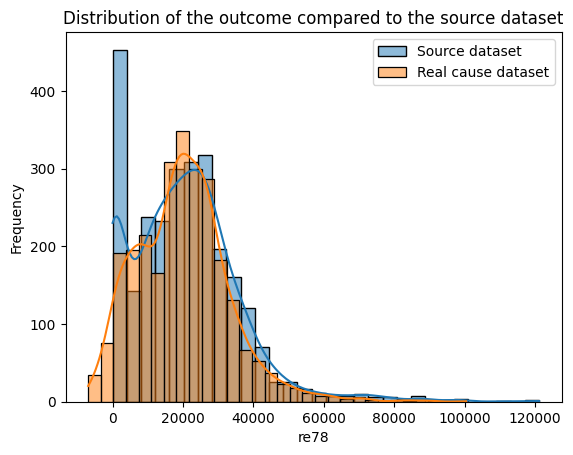

In [67]:
# Plot the distribution of values without doing density estimation on the same plot
sns.histplot(source_df, x='re78', bins=30, kde=True, alpha=0.5, label='Source dataset')
sns.histplot(rc_setting5_df, x='y', bins=30, kde=True, alpha=0.5, label='Real cause dataset')
plt.xlabel('re78')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of the outcome compared to the source dataset')

In [68]:
# Let us standardize the outcome variable so that it ranges between 0 and 1
rc_setting5_df['standardized_y'] = (rc_setting5_df['y'] - rc_setting5_df['y'].min()) / (rc_setting5_df['y'].max() - rc_setting5_df['y'].min())
# Compute the naive ATE estimate for the real cause dataset using the standardized outcome as well as the original outcome
naive_ate = rc_setting5_df[rc_setting5_df.t == 1].y.mean() - rc_setting5_df[rc_setting5_df.t == 0].y.mean()
naive_ate_standardized = rc_setting5_df[rc_setting5_df.t == 1].standardized_y.mean() - rc_setting5_df[rc_setting5_df.t == 0].standardized_y.mean()
print(f'Naive ATE estimate: {naive_ate}')
print(f'Naive ATE estimate (standardized): {naive_ate_standardized}')

Naive ATE estimate: -20819.76994905308
Naive ATE estimate (standardized): -0.1939442289295049


Text(0.5, 1.0, 'Comparison of the standardized distribution of the outcome')

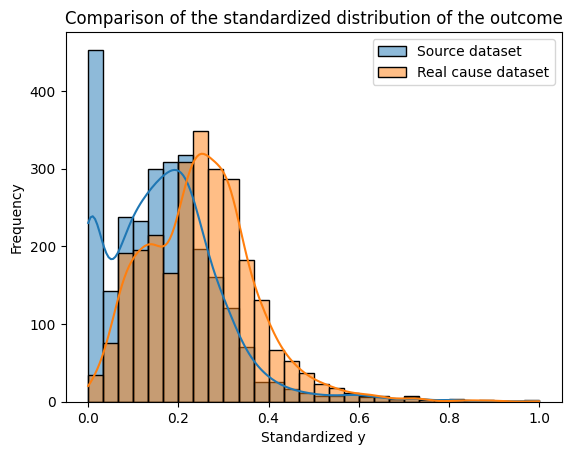

In [69]:
# Plot the standardized distribution of the outcome: P(Y)
sns.histplot(source_df, x='standardized_re78', bins=30, kde=True, alpha=0.5, label='Source dataset')
sns.histplot(rc_setting5_df, x='standardized_y', bins=30, kde=True, alpha=0.5, label='Real cause dataset')
plt.xlabel('Standardized y')
plt.ylabel('Frequency')
plt.legend()
plt.title('Comparison of the standardized distribution of the outcome')

Text(0.5, 1.0, 'Comparison of the standardized distribution of the outcome for the treated group')

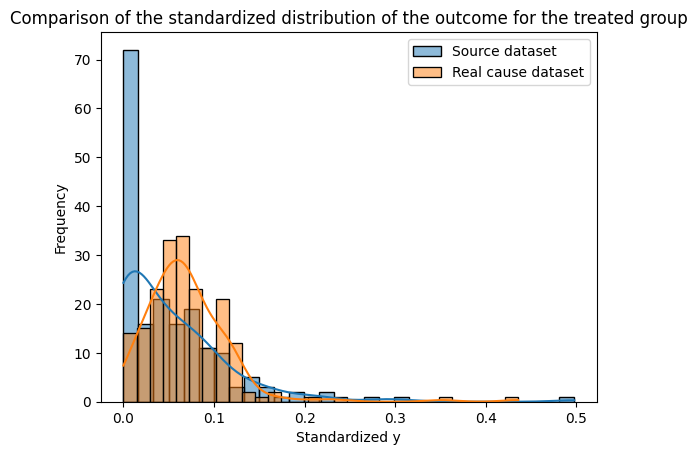

In [70]:
# Compare the distributions of the outcome for the treated and control groups
sns.histplot(source_df[source_df.treat == 1], x='standardized_re78', bins=30, kde=True, alpha=0.5, label='Source dataset')
sns.histplot(rc_setting5_df[rc_setting5_df.t == 1], x='standardized_y', bins=30, kde=True, alpha=0.5, label='Real cause dataset')
plt.xlabel('Standardized y')
plt.ylabel('Frequency')
plt.legend()
plt.title('Comparison of the standardized distribution of the outcome for the treated group')

Text(0.5, 1.0, 'Comparison of the standardized distribution of the outcome for the control group')

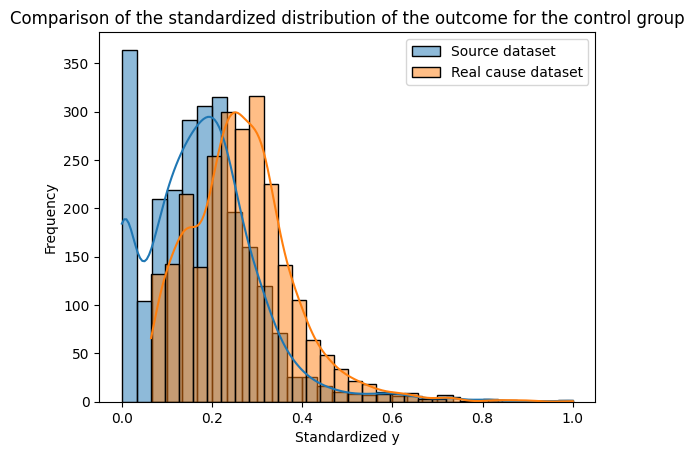

In [71]:

# Compare the distributions of the outcome for the treated and control groups
sns.histplot(source_df[source_df.treat == 0], x='standardized_re78', bins=30, kde=True, alpha=0.5, label='Source dataset')
sns.histplot(rc_setting5_df[rc_setting5_df.t == 0], x='standardized_y', bins=30, kde=True, alpha=0.5, label='Real cause dataset')
plt.xlabel('Standardized y')
plt.ylabel('Frequency')
plt.legend()
plt.title('Comparison of the standardized distribution of the outcome for the control group')

In [72]:
# Let us normalize the outcome variable so that it has a mean of 0 and a standard deviation of 1
source_df['normalized_re78'] = (source_df['re78'] - source_df['re78'].mean()) / source_df['re78'].std()

# Let us also normalize the outcome variable for the real cause dataset
rc_setting5_df['normalized_y'] = (rc_setting5_df['y'] - rc_setting5_df['y'].mean()) / rc_setting5_df['y'].std()

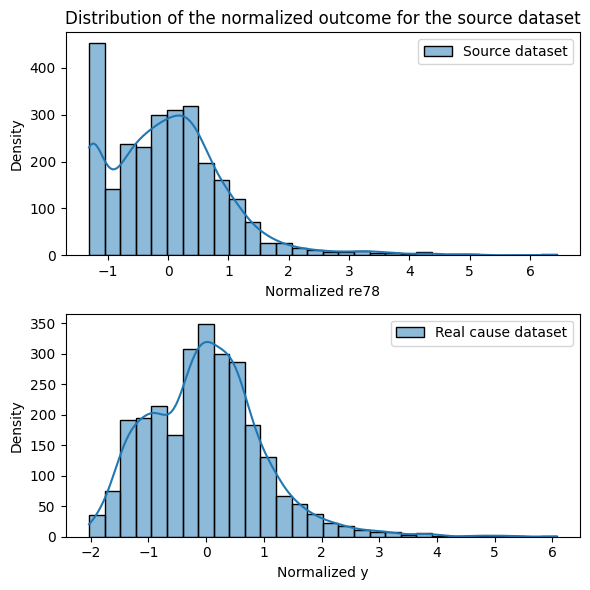

In [73]:
# Create a plot of the distribution of the outcome with two subplots for the normalized outcome
plt.figure(figsize=(6, 6))
plt.subplot(2, 1, 1)
sns.histplot(source_df, x='normalized_re78', bins=30, kde=True, alpha=0.5, label='Source dataset')
plt.xlabel('Normalized re78')
plt.ylabel('Density')
plt.legend()
plt.title('Distribution of the normalized outcome for the source dataset')
plt.subplot(2, 1, 2)
sns.histplot(rc_setting5_df, x='normalized_y', bins=30, kde=True, alpha=0.5, label='Real cause dataset')
plt.xlabel('Normalized y')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()

Text(0.5, 1.0, 'Distribution of ITE for the real cause dataset')

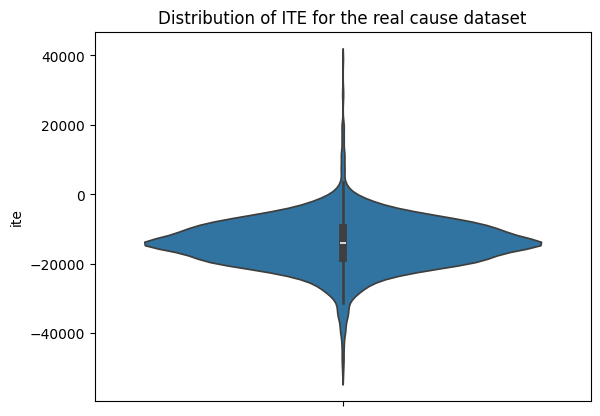

In [74]:
# Plot the ITE distribution for the real cause dataset
sns.violinplot(data=rc_setting5_df, y='ite')
plt.title('Distribution of ITE for the real cause dataset')

Setting the degree of heterogeneity changes the distribution of the outcome.

### Realcause: Setting 6

We set the degree of heterogeneity and do not transform the outcome back to the original scale. 

In [64]:
# Load the dataset
rc_set6_snum = np.random.randint(0, 10)
print(f'Sample number: {rc_set6_snum}')
rc_setting6_df = pd.read_csv(f'../nfl_datasets/lalonde_psid_setting6/lalonde_psid_sample{rc_set6_snum}.csv')

Sample number: 6


In [65]:
# Examine the dataset
rc_setting6_df.head()

,age,education,black,hispanic,married,nodegree,re74,re75,t,y,y0,y1,ite
0,37.0,11.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.049731,0.049731,-0.036097,-0.085828
1,22.0,9.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.054542,0.178200,0.054542,-0.123659
2,30.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.065447,0.065447,-0.028239,-0.093686
3,27.0,11.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.019564,0.038663,-0.019564,-0.058227
4,33.0,8.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.248428,0.185176,0.248428,0.063251


In [66]:
# Get some basic information about the dataset
print(f'Total number of samples: {rc_setting6_df.shape[0]}')
print(f'Total number of columns: {rc_setting6_df.shape[1]}')
print(f'Column names: {rc_setting6_df.columns}')

# Find the proportion of treated and untreated samples
print(f'Count of treated samples and untreated samples:\n{rc_setting6_df.t.value_counts()}')
print(f'Proportion of treated samples and untreated samples:\n{rc_setting6_df.t.value_counts(normalize=True)}')

Total number of samples: 2675
Total number of columns: 13
Column names: Index(['age', 'education', 'black', 'hispanic', 'married', 'nodegree', 're74',
       're75', 't', 'y', 'y0', 'y1', 'ite'],
      dtype='object')
Count of treated samples and untreated samples:
t
0.0    2517
1.0     158
Name: count, dtype: int64
Proportion of treated samples and untreated samples:
t
0.0    0.940935
1.0    0.059065
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Distribution of the treatment compared to the source dataset')

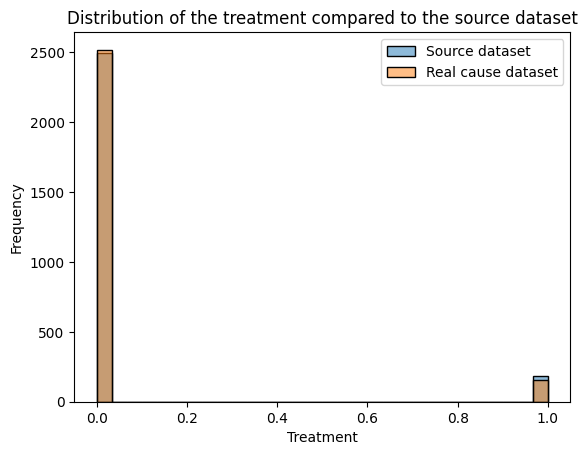

In [67]:
# Plot the distribution of the treatment comparing the 'treat' and 't' columns
sns.histplot(source_df, x='treat', bins=30, kde=False, alpha=0.5, label='Source dataset')
sns.histplot(rc_setting6_df, x='t', bins=30, kde=False, alpha=0.5, label='Real cause dataset')
plt.xlabel('Treatment')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of the treatment compared to the source dataset')

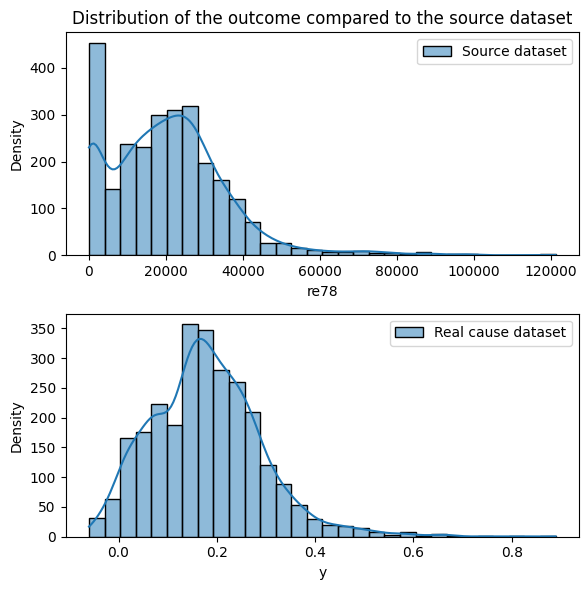

In [68]:
# Plot the distribution of the outcome comparing the 're78' and 'y' columns
plt.figure(figsize=(6, 6))
plt.subplot(2, 1, 1)
sns.histplot(source_df, x='re78', bins=30, kde=True, alpha=0.5, label='Source dataset')
plt.xlabel('re78')
plt.ylabel('Density')
plt.legend()
plt.title('Distribution of the outcome compared to the source dataset')

plt.subplot(2, 1, 2)
sns.histplot(rc_setting6_df, x='y', bins=30, kde=True, alpha=0.5, label='Real cause dataset')
plt.xlabel('y')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()

Text(0.5, 1.0, 'Distribution of the outcome compared to the source dataset')

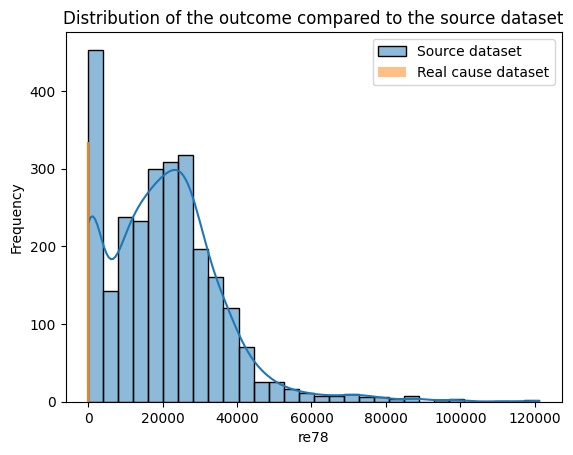

In [69]:
# Plot the distribution of values without doing density estimation on the same plot
sns.histplot(source_df, x='re78', bins=30, kde=True, alpha=0.5, label='Source dataset')
sns.histplot(rc_setting6_df, x='y', bins=30, kde=True, alpha=0.5, label='Real cause dataset')
plt.xlabel('re78')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of the outcome compared to the source dataset')

In [70]:
# Let us standardize the outcome variable so that it ranges between 0 and 1
rc_setting6_df['standardized_y'] = (rc_setting6_df['y'] - rc_setting6_df['y'].min()) / (rc_setting6_df['y'].max() - rc_setting6_df['y'].min())
# Compute the naive ATE estimate for the real cause dataset using the standardized outcome as well as the original outcome
naive_ate = rc_setting6_df[rc_setting6_df.t == 1].y.mean() - rc_setting6_df[rc_setting6_df.t == 0].y.mean()
naive_ate_standardized = rc_setting6_df[rc_setting6_df.t == 1].standardized_y.mean() - rc_setting6_df[rc_setting6_df.t == 0].standardized_y.mean()
print(f'Naive ATE estimate: {naive_ate}')
print(f'Naive ATE estimate (standardized): {naive_ate_standardized}')

# Let us normalize the outcome variable so that it has a mean of 0 and a standard deviation of 1
rc_setting6_df['normalized_y'] = (rc_setting6_df['y'] - rc_setting6_df['y'].mean()) / rc_setting6_df['y'].std()
naive_ate_normalized = rc_setting6_df[rc_setting6_df.t == 1].normalized_y.mean() - rc_setting6_df[rc_setting6_df.t == 0].normalized_y.mean()
print(f'Naive ATE estimate (normalized): {naive_ate_normalized}')

Naive ATE estimate: -0.17461175437500748
Naive ATE estimate (standardized): -0.18392354622901447
Naive ATE estimate (normalized): -1.5385835435646735


Text(0.5, 1.0, 'Comparison of the standardized distribution of the outcome')

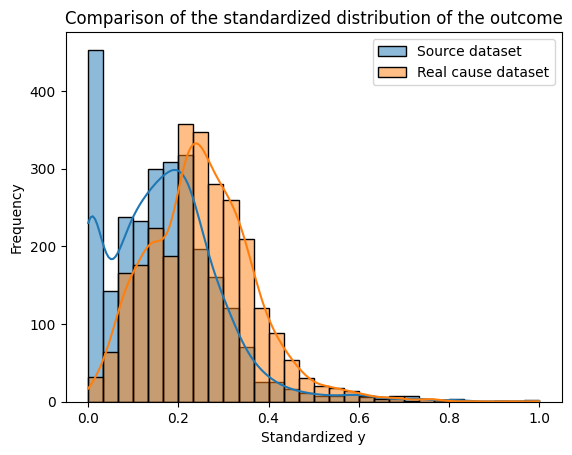

In [71]:
# Plot the standardized distribution of the outcome: P(Y)
sns.histplot(source_df, x='standardized_re78', bins=30, kde=True, alpha=0.5, label='Source dataset')
sns.histplot(rc_setting6_df, x='standardized_y', bins=30, kde=True, alpha=0.5, label='Real cause dataset')
plt.xlabel('Standardized y')
plt.ylabel('Frequency')
plt.legend()
plt.title('Comparison of the standardized distribution of the outcome')

Text(0.5, 1.0, 'Comparison of the normalized distribution of the outcome')

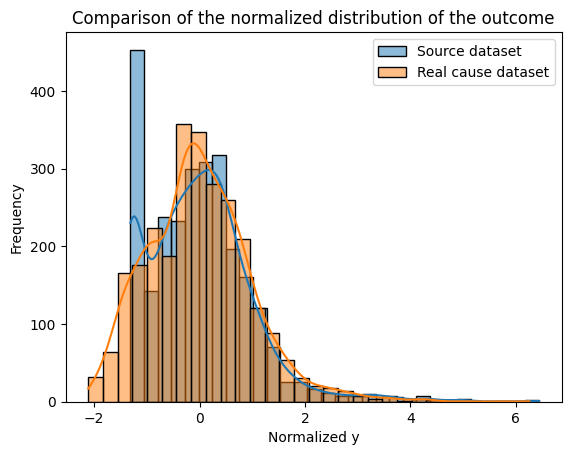

In [72]:
# Plot the normalized distribution of the outcome: P(Y)
sns.histplot(source_df, x='normalized_re78', bins=30, kde=True, alpha=0.5, label='Source dataset')
sns.histplot(rc_setting6_df, x='normalized_y', bins=30, kde=True, alpha=0.5, label='Real cause dataset')
plt.xlabel('Normalized y')
plt.ylabel('Frequency')
plt.legend()
plt.title('Comparison of the normalized distribution of the outcome')

Text(0.5, 1.0, 'Comparison of the standardized distribution of the outcome for the treated group')

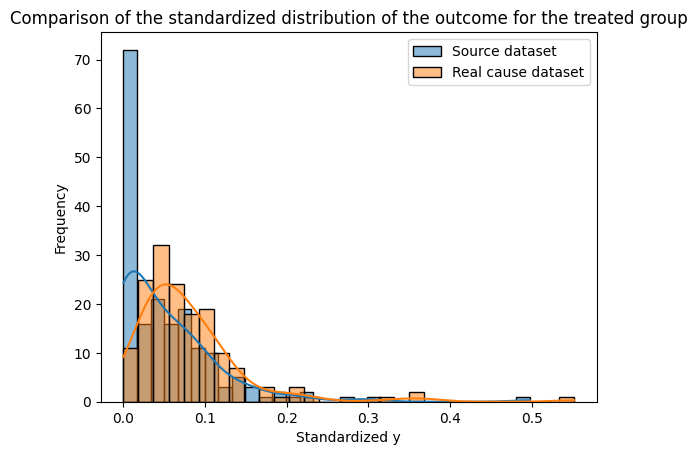

In [73]:
# Compare the distributions of the outcome for the treated and control groups
sns.histplot(source_df[source_df.treat == 1], x='standardized_re78', bins=30, kde=True, alpha=0.5, label='Source dataset')
sns.histplot(rc_setting6_df[rc_setting6_df.t == 1], x='standardized_y', bins=30, kde=True, alpha=0.5, label='Real cause dataset')
plt.xlabel('Standardized y')
plt.ylabel('Frequency')
plt.legend()
plt.title('Comparison of the standardized distribution of the outcome for the treated group')

Text(0.5, 1.0, 'Comparison of the standardized distribution of the outcome for the control group')

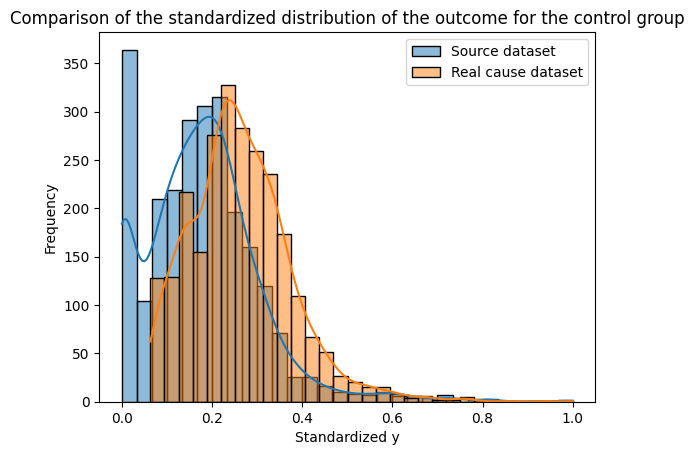

In [74]:
# Compare the distributions of the outcome for the treated and control groups
sns.histplot(source_df[source_df.treat == 0], x='standardized_re78', bins=30, kde=True, alpha=0.5, label='Source dataset')
sns.histplot(rc_setting6_df[rc_setting6_df.t == 0], x='standardized_y', bins=30, kde=True, alpha=0.5, label='Real cause dataset')
plt.xlabel('Standardized y')
plt.ylabel('Frequency')
plt.legend()
plt.title('Comparison of the standardized distribution of the outcome for the control group')

### Realcause: Setting 7

We examine the effect of the overlap parameter. Note that the dataset is already skewed. So we see if we can either increase or decrease the degree of overlap. In this dataset, the overlap parameter is set to 0.1. 

In [75]:
# Load the dataset
rc_set7_snum = np.random.randint(0, 10)
print(f'Sample number: {rc_set7_snum}')
rc_setting7_df = pd.read_csv(f'../nfl_datasets/lalonde_psid_setting7/lalonde_psid_sample{rc_set7_snum}.csv')

Sample number: 8


In [76]:
# Examine the dataset
rc_setting7_df.head()

,age,education,black,hispanic,married,nodegree,re74,re75,t,y,y0,y1,ite
0,37.0,11.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,5367.6084,5367.6084,4573.4414,-794.1670
1,22.0,9.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3457.8884,3457.8884,0.0000,-3457.8884
2,30.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1114.4116,1114.4116,10000.5550,8886.1430
3,27.0,11.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0000,0.0000,6445.3813,6445.3813
4,33.0,8.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0000,0.0000,0.0000,0.0000


In [77]:
# Get some basic information about the dataset
print(f'Total number of samples: {rc_setting7_df.shape[0]}')
print(f'Total number of columns: {rc_setting7_df.shape[1]}')
print(f'Column names: {rc_setting7_df.columns}')

# Find the proportion of treated and untreated samples
print(f'Count of treated samples and untreated samples:\n{rc_setting7_df.t.value_counts()}')
print(f'Proportion of treated samples and untreated samples:\n{rc_setting7_df.t.value_counts(normalize=True)}')

Total number of samples: 2675
Total number of columns: 13
Column names: Index(['age', 'education', 'black', 'hispanic', 'married', 'nodegree', 're74',
       're75', 't', 'y', 'y0', 'y1', 'ite'],
      dtype='object')
Count of treated samples and untreated samples:
t
0.0    2492
1.0     183
Name: count, dtype: int64
Proportion of treated samples and untreated samples:
t
0.0    0.931589
1.0    0.068411
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Distribution of the treatment compared to the source dataset')

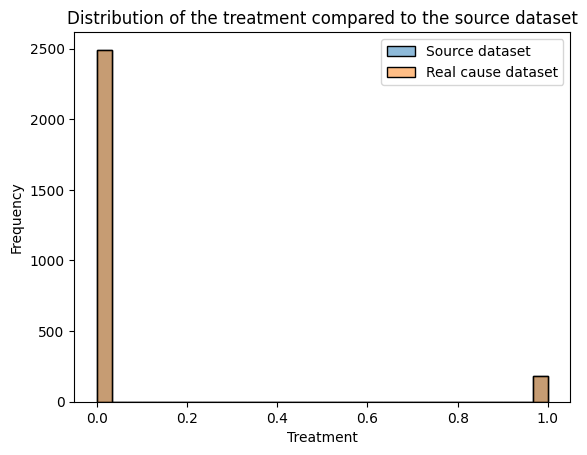

In [78]:
# Plot the distribution of the treatment comparing the 'treat' and 't' columns
sns.histplot(source_df, x='treat', bins=30, kde=False, alpha=0.5, label='Source dataset')
sns.histplot(rc_setting7_df, x='t', bins=30, kde=False, alpha=0.5, label='Real cause dataset')
plt.xlabel('Treatment')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of the treatment compared to the source dataset')

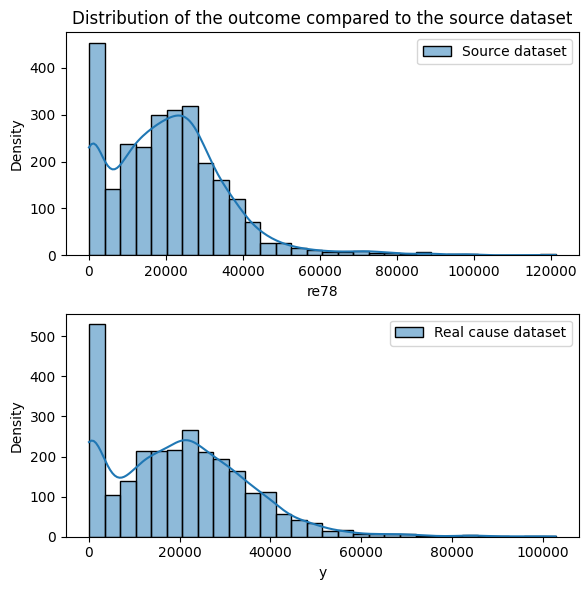

In [79]:
# Plot the distribution of the outcome comparing the 're78' and 'y' columns
plt.figure(figsize=(6, 6))
plt.subplot(2, 1, 1)
sns.histplot(source_df, x='re78', bins=30, kde=True, alpha=0.5, label='Source dataset')
plt.xlabel('re78')
plt.ylabel('Density')
plt.legend()
plt.title('Distribution of the outcome compared to the source dataset')

plt.subplot(2, 1, 2)
sns.histplot(rc_setting7_df, x='y', bins=30, kde=True, alpha=0.5, label='Real cause dataset')
plt.xlabel('y')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()

In [80]:
# Examine the effects of the other two overlap settings 
# Load the dataset
rc_set8_snum = np.random.randint(0, 10)
print(f'Sample number: {rc_set8_snum}')
rc_setting8_df = pd.read_csv(f'../nfl_datasets/lalonde_psid_setting8/lalonde_psid_sample{rc_set8_snum}.csv')

Sample number: 9


In [81]:
# Examine the dataset
rc_setting8_df.head()

,age,education,black,hispanic,married,nodegree,re74,re75,t,y,y0,y1,ite
0,37.0,11.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.00,8132.5317,0.0000,-8132.5317
1,22.0,9.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.00,0.0000,14058.9870,14058.9870
2,30.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0000,2357.3206,2357.3206
3,27.0,11.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.00,7738.7190,0.0000,-7738.7190
4,33.0,8.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,5291.83,0.0000,5291.8300,5291.8300


In [82]:
# Get some basic information about the dataset
print(f'Total number of samples: {rc_setting8_df.shape[0]}')
print(f'Total number of columns: {rc_setting8_df.shape[1]}')
print(f'Column names: {rc_setting8_df.columns}')

# Find the proportion of treated and untreated samples
print(f'Count of treated samples and untreated samples:\n{rc_setting8_df.t.value_counts()}')
print(f'Proportion of treated samples and untreated samples:\n{rc_setting8_df.t.value_counts(normalize=True)}')

Total number of samples: 2675
Total number of columns: 13
Column names: Index(['age', 'education', 'black', 'hispanic', 'married', 'nodegree', 're74',
       're75', 't', 'y', 'y0', 'y1', 'ite'],
      dtype='object')
Count of treated samples and untreated samples:
t
0.0    2499
1.0     176
Name: count, dtype: int64
Proportion of treated samples and untreated samples:
t
0.0    0.934206
1.0    0.065794
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Distribution of the treatment compared to the source dataset')

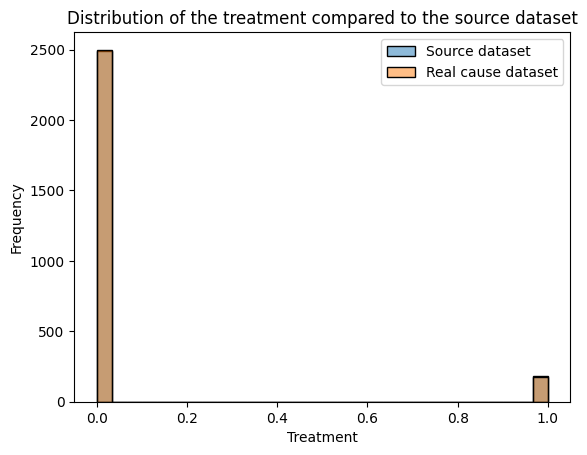

In [83]:
# Plot the distribution of the treatment comparing the 'treat' and 't' columns
sns.histplot(source_df, x='treat', bins=30, kde=False, alpha=0.5, label='Source dataset')
sns.histplot(rc_setting8_df, x='t', bins=30, kde=False, alpha=0.5, label='Real cause dataset')
plt.xlabel('Treatment')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of the treatment compared to the source dataset')

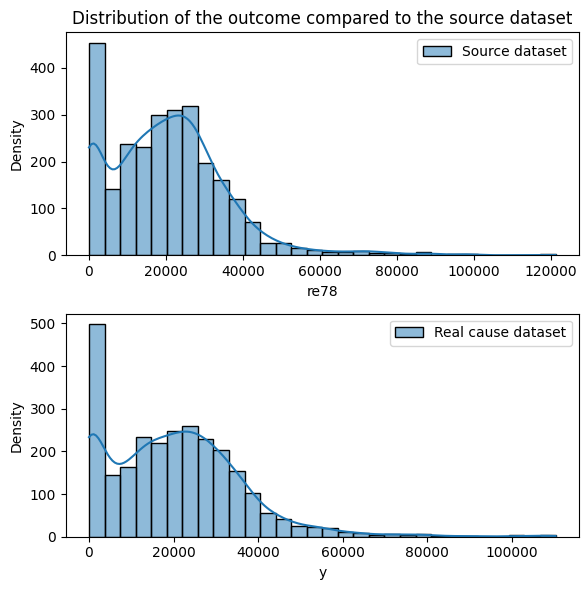

In [84]:
# Plot the distribution of the outcome comparing the 're78' and 'y' columns
plt.figure(figsize=(6, 6))
plt.subplot(2, 1, 1)
sns.histplot(source_df, x='re78', bins=30, kde=True, alpha=0.5, label='Source dataset')
plt.xlabel('re78')
plt.ylabel('Density')
plt.legend()
plt.title('Distribution of the outcome compared to the source dataset')

plt.subplot(2, 1, 2)
sns.histplot(rc_setting8_df, x='y', bins=30, kde=True, alpha=0.5, label='Real cause dataset')
plt.xlabel('y')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()

In [85]:
# Overlap setting 9
# Load the dataset
rc_set9_snum = np.random.randint(0, 10)
print(f'Sample number: {rc_set9_snum}')
rc_setting9_df = pd.read_csv(f'../nfl_datasets/lalonde_psid_setting9/lalonde_psid_sample{rc_set9_snum}.csv')

Sample number: 6


In [86]:
# Examine the dataset
rc_setting9_df.head()


,age,education,black,hispanic,married,nodegree,re74,re75,t,y,y0,y1,ite
0,37.0,11.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1468.6572,1468.6572,0.000,-1468.6572
1,22.0,9.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,5928.9190,19941.9570,5928.919,-14013.0380
2,30.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.000,0.0000
3,27.0,11.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,4891.3380,3596.3843,4891.338,1294.9536
4,33.0,8.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,45692.1700,0.0000,45692.170,45692.1700


In [87]:
# Get some basic information about the dataset
print(f'Total number of samples: {rc_setting9_df.shape[0]}')
print(f'Total number of columns: {rc_setting9_df.shape[1]}')
print(f'Column names: {rc_setting9_df.columns}')

# Find the proportion of treated and untreated samples
print(f'Count of treated samples and untreated samples:\n{rc_setting9_df.t.value_counts()}')
print(f'Proportion of treated samples and untreated samples:\n{rc_setting9_df.t.value_counts(normalize=True)}')

Total number of samples: 2675
Total number of columns: 13
Column names: Index(['age', 'education', 'black', 'hispanic', 'married', 'nodegree', 're74',
       're75', 't', 'y', 'y0', 'y1', 'ite'],
      dtype='object')
Count of treated samples and untreated samples:
t
0.0    2517
1.0     158
Name: count, dtype: int64
Proportion of treated samples and untreated samples:
t
0.0    0.940935
1.0    0.059065
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Distribution of the treatment compared to the source dataset')

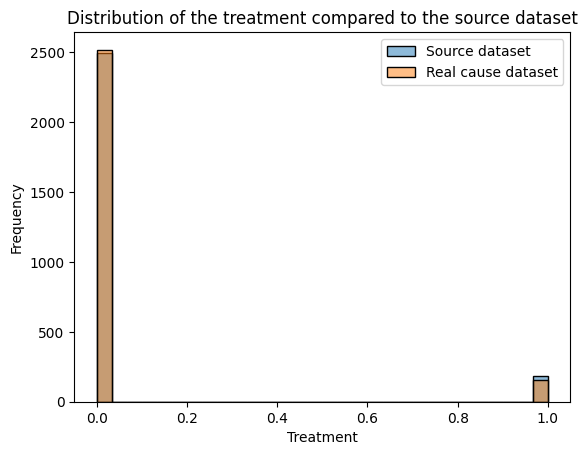

In [88]:
# Plot the distribution of the treatment comparing the 'treat' and 't' columns
sns.histplot(source_df, x='treat', bins=30, kde=False, alpha=0.5, label='Source dataset')
sns.histplot(rc_setting9_df, x='t', bins=30, kde=False, alpha=0.5, label='Real cause dataset')
plt.xlabel('Treatment')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of the treatment compared to the source dataset')

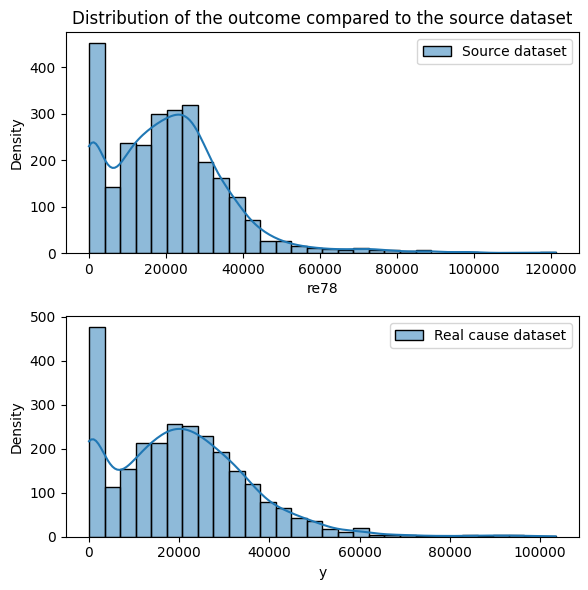

In [89]:
# Plot the distribution of the outcome comparing the 're78' and 'y' columns
plt.figure(figsize=(6, 6))
plt.subplot(2, 1, 1)
sns.histplot(source_df, x='re78', bins=30, kde=True, alpha=0.5, label='Source dataset')
plt.xlabel('re78')
plt.ylabel('Density')
plt.legend()
plt.title('Distribution of the outcome compared to the source dataset')

plt.subplot(2, 1, 2)
sns.histplot(rc_setting9_df, x='y', bins=30, kde=True, alpha=0.5, label='Real cause dataset')
plt.xlabel('y')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()

In the code, overlap is not doing anything! It probably has not been implemented yet. 

### Realcause: Setting 10

Setting the degree of heterogeneity to 0, the same as was possible with the Credence dataset. We transform the y values back to the original scale, and set the causal effect to be -10.0

In [75]:
# Load the dataset
rc_set10_snum = np.random.randint(0, 50)
print(f'Sample number: {rc_set10_snum}')
rc_setting10_df = pd.read_csv(f'../nfl_datasets/lalonde_psid_setting10/lalonde_psid_sample{rc_set10_snum}.csv')

Sample number: 13


In [76]:
# Examine the dataset
rc_setting10_df.head()

,age,education,black,hispanic,married,nodegree,re74,re75,t,y,y0,y1,ite
0,37.0,11.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.264172e+06,1.264172e+06,155877.045117,-1.108295e+06
1,22.0,9.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-7.878436e+05,3.204514e+05,-787843.562164,-1.108295e+06
2,30.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.468109e+06,1.468109e+06,359814.432045,-1.108295e+06
3,27.0,11.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,9.149184e+05,9.149184e+05,-193376.534513,-1.108295e+06
4,33.0,8.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.286034e+06,1.286034e+06,177738.527755,-1.108295e+06


In [77]:
# Get some basic information about the dataset
print(f'Total number of samples: {rc_setting10_df.shape[0]}')
print(f'Total number of columns: {rc_setting10_df.shape[1]}')
print(f'Column names: {rc_setting10_df.columns}')

# Find the proportion of treated and untreated samples
print(f'Count of treated samples and untreated samples:\n{rc_setting10_df.t.value_counts()}')
print(f'Proportion of treated samples and untreated samples:\n{rc_setting10_df.t.value_counts(normalize=True)}')

Total number of samples: 2675
Total number of columns: 13
Column names: Index(['age', 'education', 'black', 'hispanic', 'married', 'nodegree', 're74',
       're75', 't', 'y', 'y0', 'y1', 'ite'],
      dtype='object')
Count of treated samples and untreated samples:
t
0.0    2473
1.0     202
Name: count, dtype: int64
Proportion of treated samples and untreated samples:
t
0.0    0.924486
1.0    0.075514
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Distribution of the treatment compared to the source dataset')

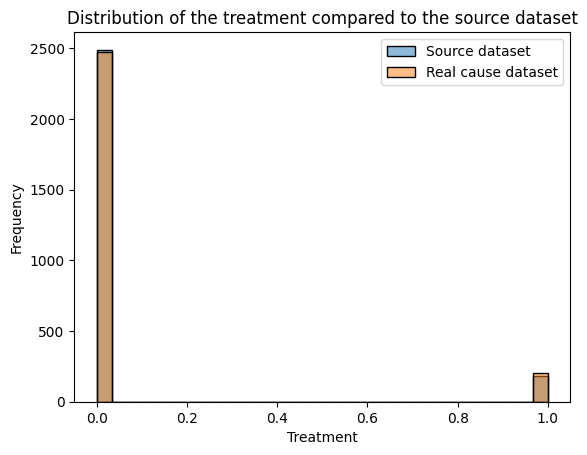

In [78]:
# Plot the distribution of the treatment comparing the 'treat' and 't' columns
sns.histplot(source_df, x='treat', bins=30, kde=False, alpha=0.5, label='Source dataset')
sns.histplot(rc_setting10_df, x='t', bins=30, kde=False, alpha=0.5, label='Real cause dataset')
plt.xlabel('Treatment')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of the treatment compared to the source dataset')

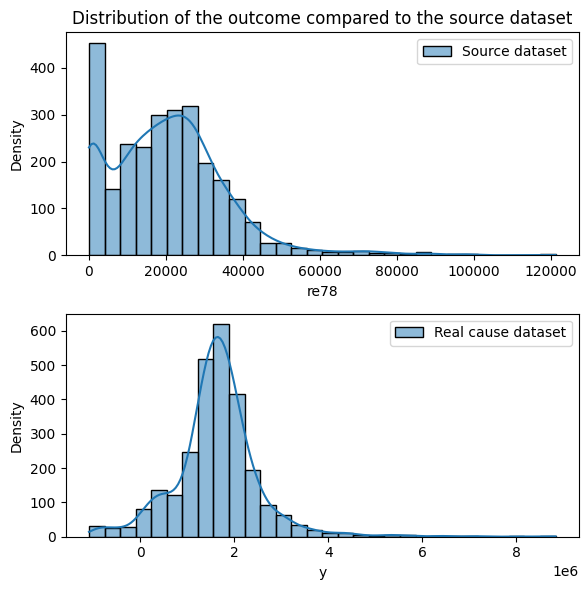

In [79]:
# Plot the distribution of the outcome comparing the 're78' and 'y' columns
plt.figure(figsize=(6, 6))
plt.subplot(2, 1, 1)
sns.histplot(source_df, x='re78', bins=30, kde=True, alpha=0.5, label='Source dataset')
plt.xlabel('re78')
plt.ylabel('Density')
plt.legend()
plt.title('Distribution of the outcome compared to the source dataset')

plt.subplot(2, 1, 2)
sns.histplot(rc_setting10_df, x='y', bins=30, kde=True, alpha=0.5, label='Real cause dataset')
plt.xlabel('y')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()

In [80]:
# Standardize the outcome variable so that it ranges between 0 and 1
rc_setting10_df['standardized_y'] = (rc_setting10_df['y'] - rc_setting10_df['y'].min()) / (rc_setting10_df['y'].max() - rc_setting10_df['y'].min())
# Normalize the outcome variable so that it has a mean of 0 and a standard deviation of 1
rc_setting10_df['normalized_y'] = (rc_setting10_df['y'] - rc_setting10_df['y'].mean()) / rc_setting10_df['y'].std()

# Compute the naive ATE estimate for the real cause dataset using the standardized outcome as well as the original outcome
naive_ate = rc_setting10_df[rc_setting10_df.t == 1].y.mean() - rc_setting10_df[rc_setting10_df.t == 0].y.mean()
naive_ate_standardized = rc_setting10_df[rc_setting10_df.t == 1].standardized_y.mean() - rc_setting10_df[rc_setting10_df.t == 0].standardized_y.mean()
naive_ate_normalized = rc_setting10_df[rc_setting10_df.t == 1].normalized_y.mean() - rc_setting10_df[rc_setting10_df.t == 0].normalized_y.mean()
print(f'Naive ATE estimate: {naive_ate}')
print(f'Naive ATE estimate (standardized): {naive_ate_standardized}')
print(f'Naive ATE estimate (normalized): {naive_ate_normalized}')

# Compute the exact ATE estimate for all three versions of the outcome
exact_ate = rc_setting10_df['ite'].mean()
print(f'Exact ATE estimate: {exact_ate}')

Naive ATE estimate: -1783928.2309113066
Naive ATE estimate (standardized): -0.17962403801482735
Naive ATE estimate (normalized): -1.9210918134417532
Exact ATE estimate: -1108294.9762926167


Text(0.5, 1.0, 'Comparison of the standardized distribution of the outcome')

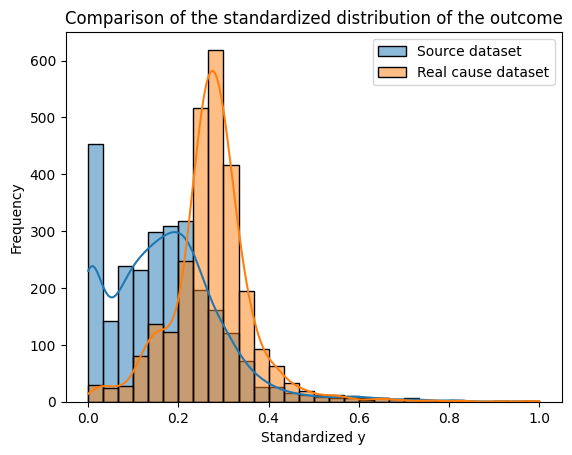

In [81]:
# Plot the standardized distribution of the outcome: P(Y)
sns.histplot(source_df, x='standardized_re78', bins=30, kde=True, alpha=0.5, label='Source dataset')
sns.histplot(rc_setting10_df, x='standardized_y', bins=30, kde=True, alpha=0.5, label='Real cause dataset')
plt.xlabel('Standardized y')
plt.ylabel('Frequency')
plt.legend()
plt.title('Comparison of the standardized distribution of the outcome')


Text(0.5, 1.0, 'Comparison of the normalized distribution of the outcome')

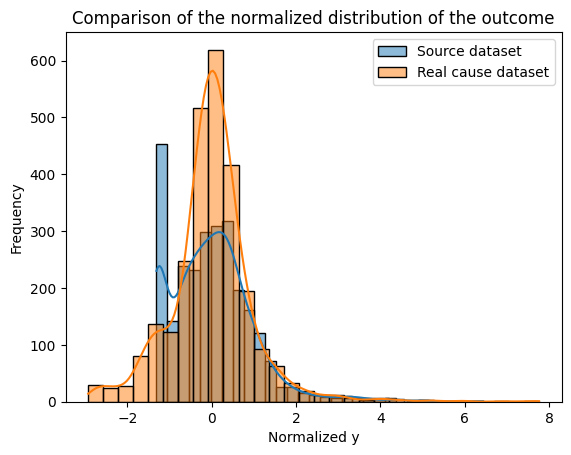

In [82]:
# Plot the normalized distribution of the outcome: P(Y)
sns.histplot(source_df, x='normalized_re78', bins=30, kde=True, alpha=0.5, label='Source dataset')
sns.histplot(rc_setting10_df, x='normalized_y', bins=30, kde=True, alpha=0.5, label='Real cause dataset')
plt.xlabel('Normalized y')
plt.ylabel('Frequency')
plt.legend()
plt.title('Comparison of the normalized distribution of the outcome')

Text(0.5, 1.0, 'Comparison of the standardized distribution of the outcome for the treated group')

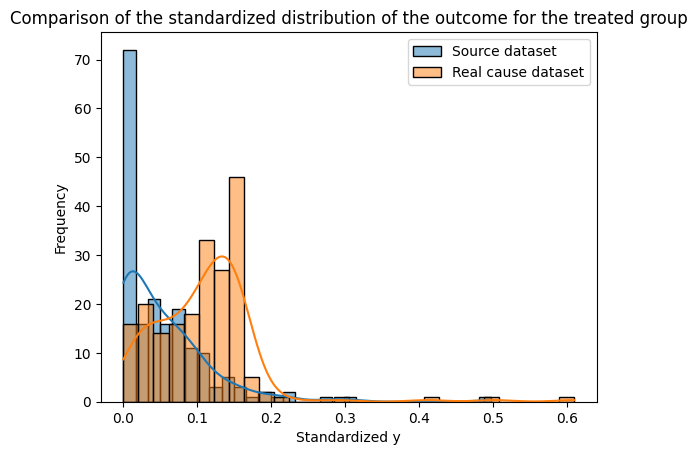

In [83]:
# Plot the distribution of the outcome for both treated and control groups
sns.histplot(source_df[source_df.treat == 1], x='standardized_re78', bins=30, kde=True, alpha=0.5, label='Source dataset')
sns.histplot(rc_setting10_df[rc_setting10_df.t == 1], x='standardized_y', bins=30, kde=True, alpha=0.5, label='Real cause dataset')
plt.xlabel('Standardized y')
plt.ylabel('Frequency')
plt.legend()
plt.title('Comparison of the standardized distribution of the outcome for the treated group')

Text(0.5, 1.0, 'Comparison of the standardized distribution of the outcome for the control group')

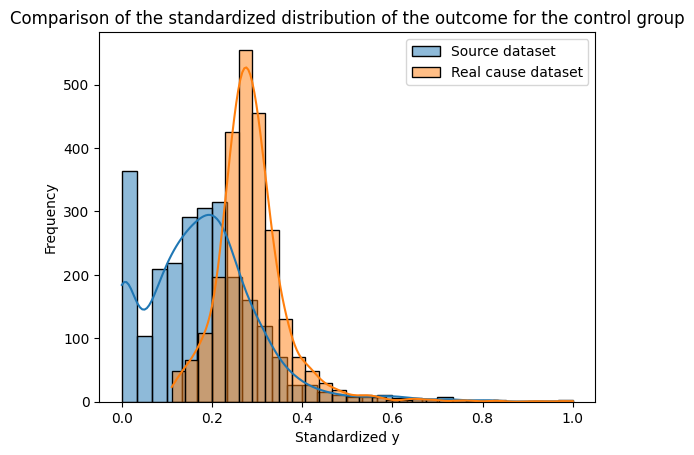

In [84]:
# Plot the distribution of the outcome for both treated and control groups
sns.histplot(source_df[source_df.treat == 0], x='standardized_re78', bins=30, kde=True, alpha=0.5, label='Source dataset')
sns.histplot(rc_setting10_df[rc_setting10_df.t == 0], x='standardized_y', bins=30, kde=True, alpha=0.5, label='Real cause dataset')
plt.xlabel('Standardized y')
plt.ylabel('Frequency')
plt.legend()
plt.title('Comparison of the standardized distribution of the outcome for the control group')

Text(0.5, 1.0, 'Distribution of ITE for the real cause dataset')

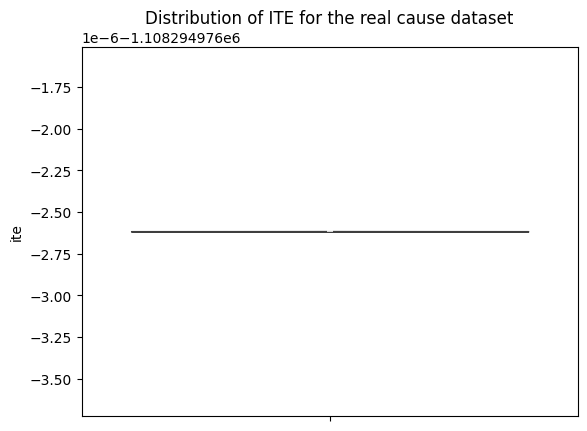

In [85]:
# Plot the ITE distribution for the real cause dataset
sns.violinplot(data=rc_setting10_df, y='ite')
plt.title('Distribution of ITE for the real cause dataset')